In [1]:
import qiskit_nature
from qiskit.algorithms.minimum_eigensolvers import NumPyMinimumEigensolver, VQE
from qiskit_nature.second_q.transformers import FreezeCoreTransformer
from qiskit_nature.second_q.formats.molecule_info import MoleculeInfo
from qiskit_nature.second_q.mappers import ParityMapper
from qiskit_nature.second_q.circuit.library import UCCSD, HartreeFock
qiskit_nature.settings.use_pauli_sum_op = False  # pylint: disable=undefined-variable
from qiskit_nature.second_q.drivers import PySCFDriver
import matplotlib.pyplot as plt
from qiskit.circuit.library import EfficientSU2

/tmp/ipykernel_167830/722258109.py:2: DeprecationWarning: ``qiskit.algorithms`` has been migrated to an independent package: https://github.com/qiskit-community/qiskit-algorithms. The ``qiskit.algorithms`` import path is deprecated as of qiskit-terra 0.25.0 and will be removed no earlier than 3 months after the release date. Please run ``pip install qiskit_algorithms`` and use ``import qiskit_algorithms`` instead.
  from qiskit.algorithms.minimum_eigensolvers import NumPyMinimumEigensolver, VQE


In [2]:
import numpy as np

np.random.seed(999999)
p0 = np.random.random()
target_distr = {0: p0, 1: 1 - p0}

In [3]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.circuit import Parameter

params = [Parameter("theta"), Parameter("phi"), Parameter("lam")]


def get_var_form(params):
    qr = QuantumRegister(1, name="q")
    cr = ClassicalRegister(1, name="c")
    qc = QuantumCircuit(qr, cr)
    qc.u(params[0], params[1], params[2], qr[0])
    qc.measure(qr, cr[0])
    return qc


qc = get_var_form(params)

In [4]:
from qiskit_aer.primitives import Sampler, Estimator

sampler = Sampler()


def objective_function(params):
    """Compares the output distribution of our circuit with
    parameters `params` to the target distribution."""
    # Simulate the circuit instance with paramters
    result = sampler.run(circuits=qc, parameter_values=params).result()
    # Get the quasi distribution for each measured state
    output_distr = result.quasi_dists[0]
    # Calculate the cost as the distance between the output
    # distribution and the target distribution
    cost = sum(
        abs(target_distr.get(i, 0) - output_distr.get(i, 0))
        for i in range(2**qc.num_qubits)
    )
    return cost

In [5]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.circuit import Parameter

params = [Parameter("theta"), Parameter("phi"), Parameter("lam")]


def get_var_form(params):
    qr = QuantumRegister(1, name="q")
    cr = ClassicalRegister(1, name="c")
    qc = QuantumCircuit(qr, cr)
    qc.u(params[0], params[1], params[2], qr[0])
    qc.measure(qr, cr[0])
    return qc


qc = get_var_form(params)

In [6]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.circuit import Parameter

params = [Parameter("theta"), Parameter("phi"), Parameter("lam")]


def get_var_form(params):
    qr = QuantumRegister(1, name="q")
    cr = ClassicalRegister(1, name="c")
    qc = QuantumCircuit(qr, cr)
    qc.u(params[0], params[1], params[2], qr[0])
    qc.measure(qr, cr[0])
    return qc


qc = get_var_form(params)

In [7]:
from qiskit.algorithms.optimizers import SPSA, SLSQP, COBYLA

optimizer = COBYLA(maxiter=500, tol=0.0001)
# Create the initial parameters (noting that our
# single qubit variational form has 3 parameters)
initial_point = np.random.rand(3)

result = optimizer.minimize(fun=objective_function, x0=initial_point)

# Obtain the output distribution using the final parameters
output_distr = (
    sampler.run(circuits=qc, parameter_values=result.x)
    .result()
    .quasi_dists[0]
)

print("Parameters Found:", result.x)
print("Target Distribution:", target_distr)
print("Obtained Distribution:", output_distr)
print("Cost:", objective_function(result.x))

Parameters Found: [0.36946952 0.80809586 1.88259209]
Target Distribution: {0: 0.308979188922057, 1: 0.691020811077943}
Obtained Distribution: {1: 0.63671875, 0: 0.36328125}
Cost: 0.112510372155886


In [8]:
molecule = MoleculeInfo(
    # Coordinates in Angstrom
    symbols=["H", "H"],
    coords=([0.0, 0.0, -0.3625], [0.0, 0.0, 0.3625]),
    multiplicity=1,
    charge=0,
)

molecule.basis = {'H': 'sto-3g', 'H': 'sto-3gg'}

/home/riccardo/.venv/lib/python3.10/site-packages/pyscf/dft/libxc.py:771: UserWarning: Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, corresponding to the original definition by Stephens et al. (issue 1480) and the same as the B3LYP functional in Gaussian. To restore the VWN5 definition, you can put the setting "B3LYP_WITH_VWN5 = True" in pyscf_conf.py
  warnings.warn('Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, '


linear entanglement:


/home/riccardo/.venv/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


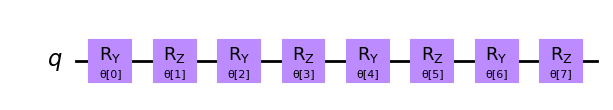

full entanglement:


/home/riccardo/.venv/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


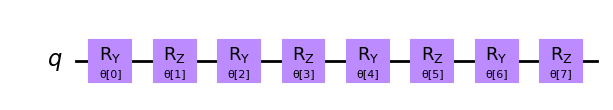

Exact Result: [-1.13722138]
VQE Result: [-1.04051927]
[[1, -1.0405192735581015]]
linear entanglement:


/home/riccardo/.venv/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


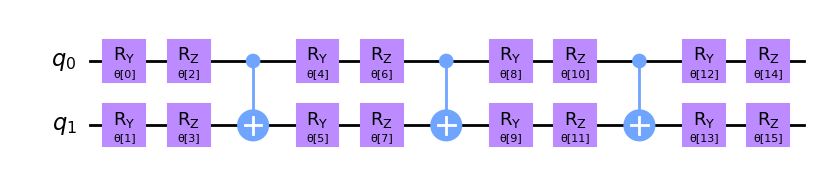

full entanglement:


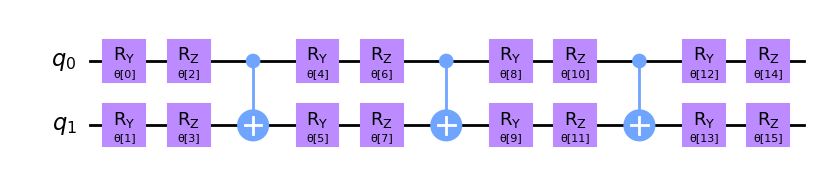

Exact Result: [-1.13722138]
VQE Result: [-1.01147584]
[[1, -1.0405192735581015], [2, -1.0114758395584578]]
linear entanglement:


/home/riccardo/.venv/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


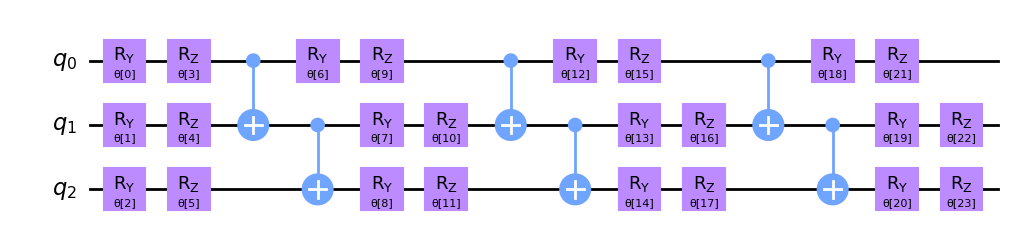

full entanglement:


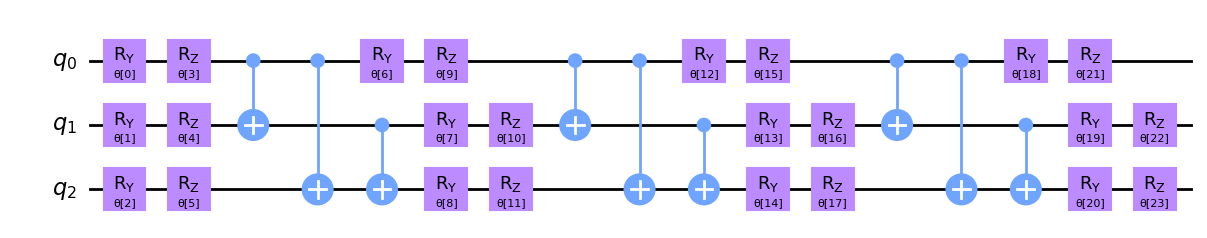

Exact Result: [-1.13722138]
VQE Result: [-1.0463744]
[[1, -1.0405192735581015], [2, -1.0114758395584578], [3, -1.046374395168488]]
linear entanglement:


/home/riccardo/.venv/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


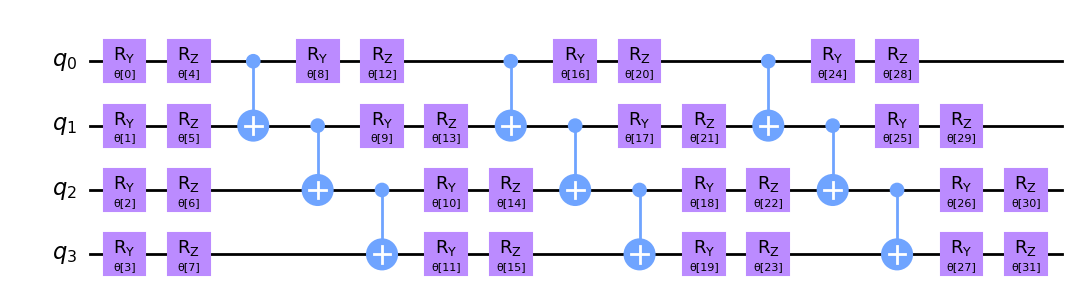

full entanglement:


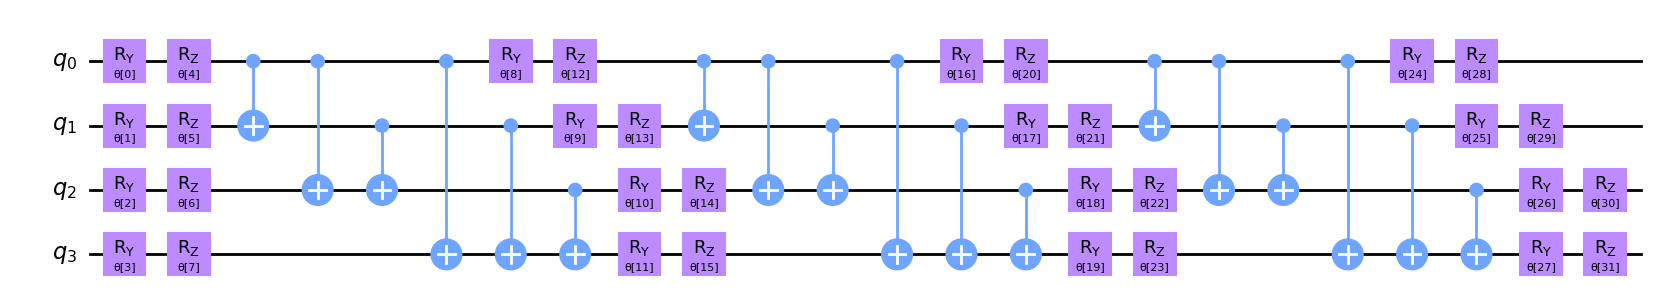

Exact Result: [-1.13722138]
VQE Result: [-1.01553544]
[[1, -1.0405192735581015], [2, -1.0114758395584578], [3, -1.046374395168488], [4, -1.015535441993665]]
linear entanglement:


/home/riccardo/.venv/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


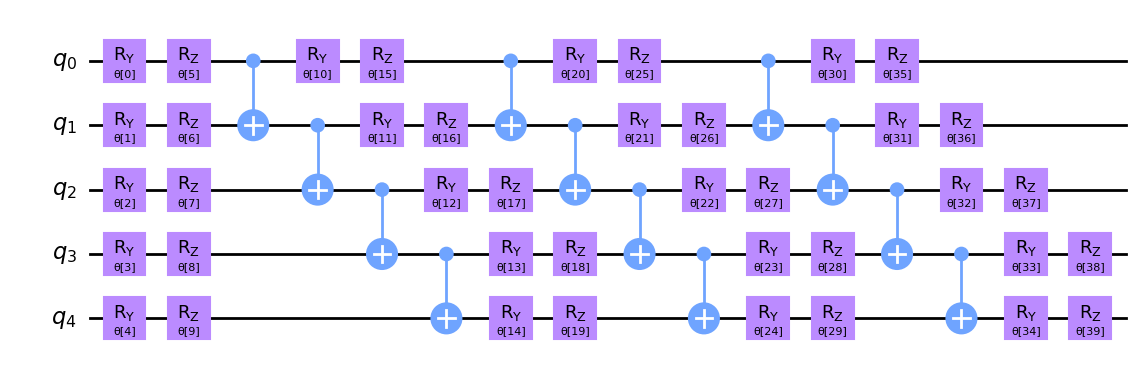

full entanglement:


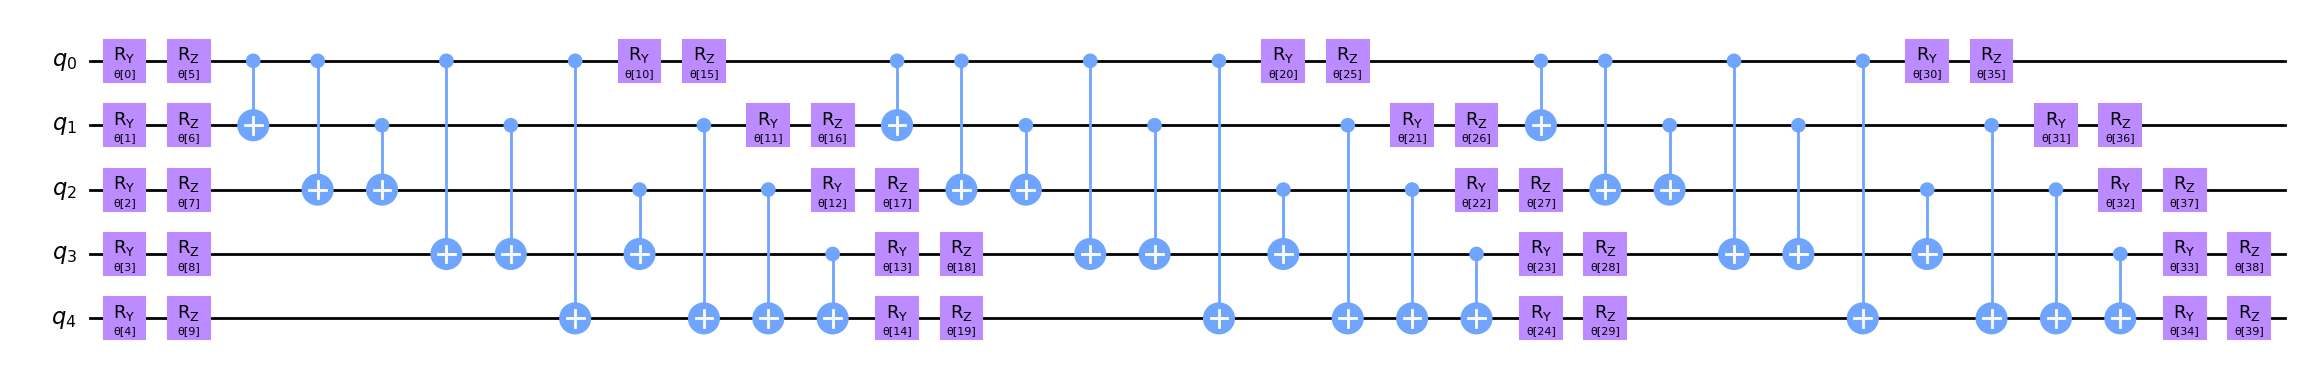

Exact Result: [-1.13722138]
VQE Result: [-1.04388334]
[[1, -1.0405192735581015], [2, -1.0114758395584578], [3, -1.046374395168488], [4, -1.015535441993665], [5, -1.0438833378350918]]
linear entanglement:


/home/riccardo/.venv/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


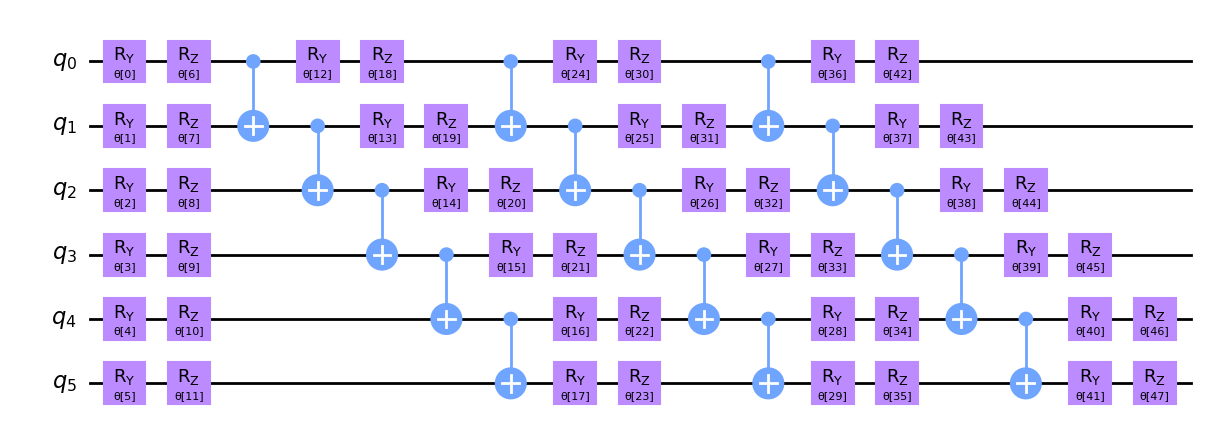

full entanglement:


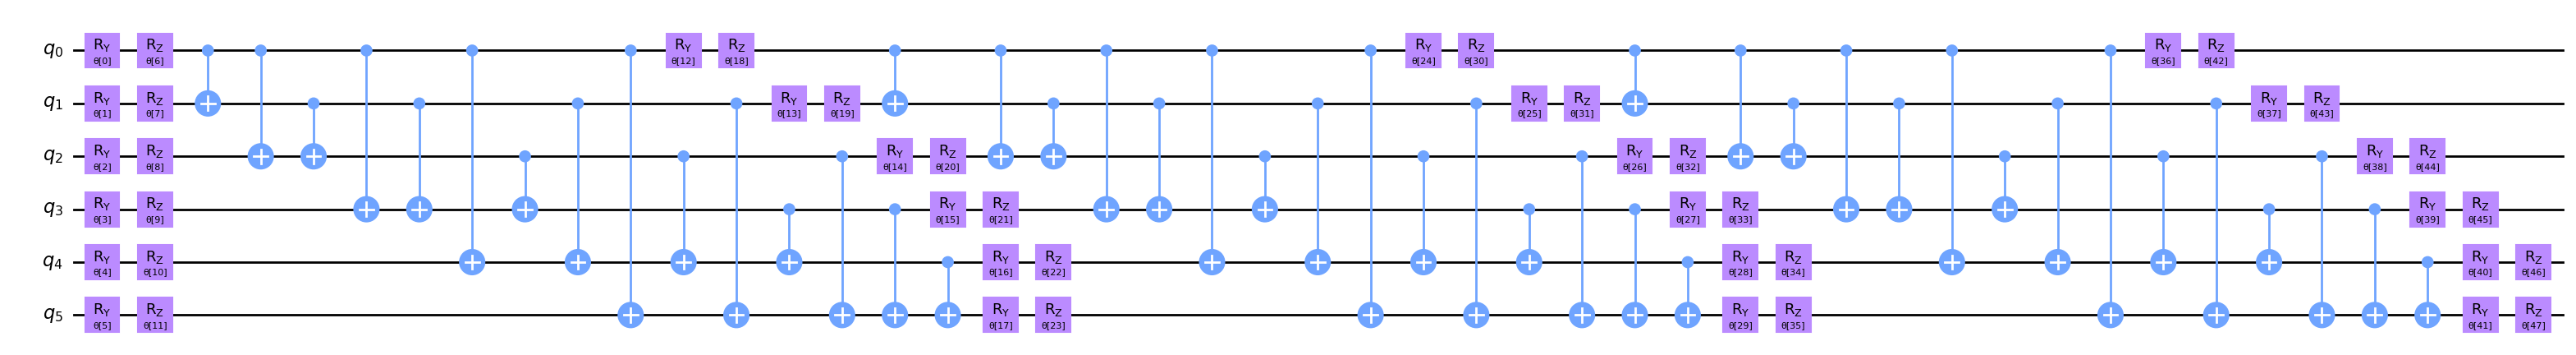

Exact Result: [-1.13722138]
VQE Result: [-1.01905701]
[[1, -1.0405192735581015], [2, -1.0114758395584578], [3, -1.046374395168488], [4, -1.015535441993665], [5, -1.0438833378350918], [6, -1.0190570118177735]]
linear entanglement:


/home/riccardo/.venv/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


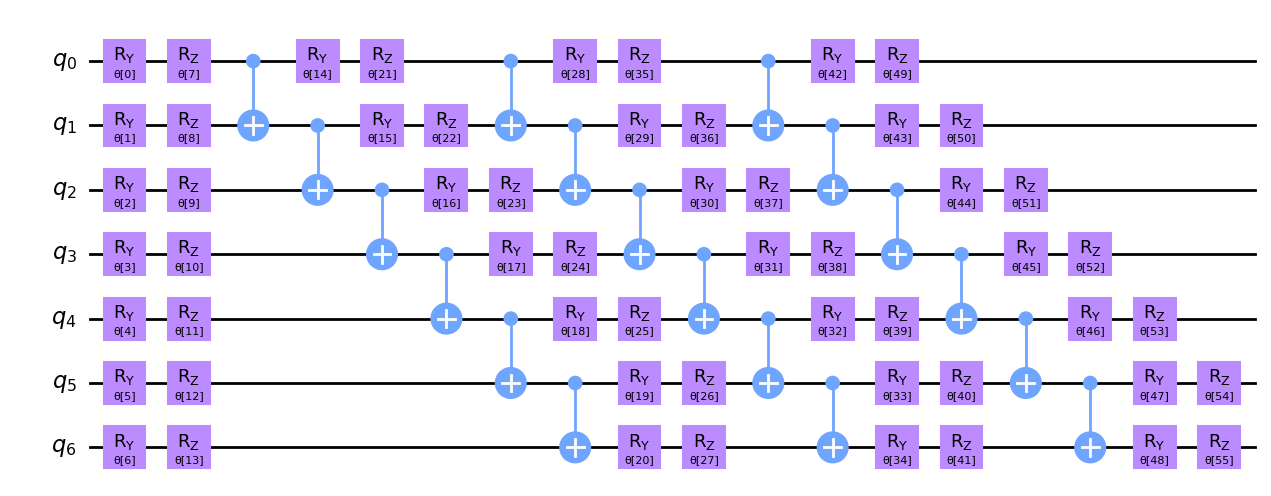

full entanglement:


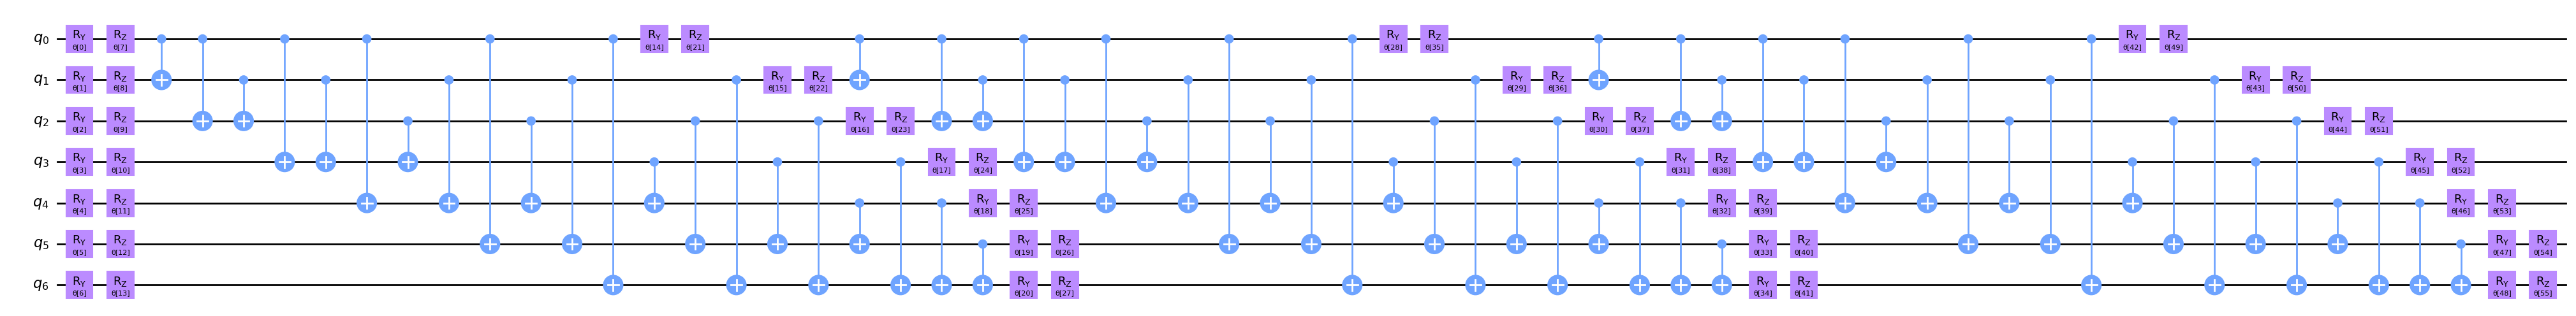

Exact Result: [-1.13722138]
VQE Result: [-1.00697468]
[[1, -1.0405192735581015], [2, -1.0114758395584578], [3, -1.046374395168488], [4, -1.015535441993665], [5, -1.0438833378350918], [6, -1.0190570118177735], [7, -1.006974683670713]]
linear entanglement:


/home/riccardo/.venv/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


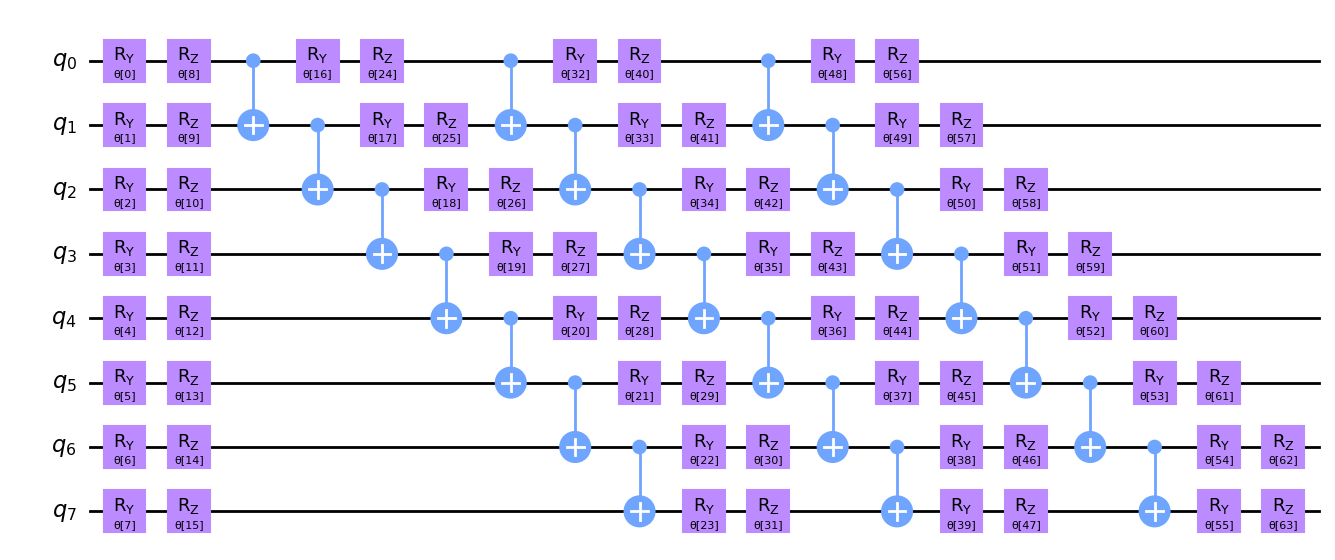

full entanglement:


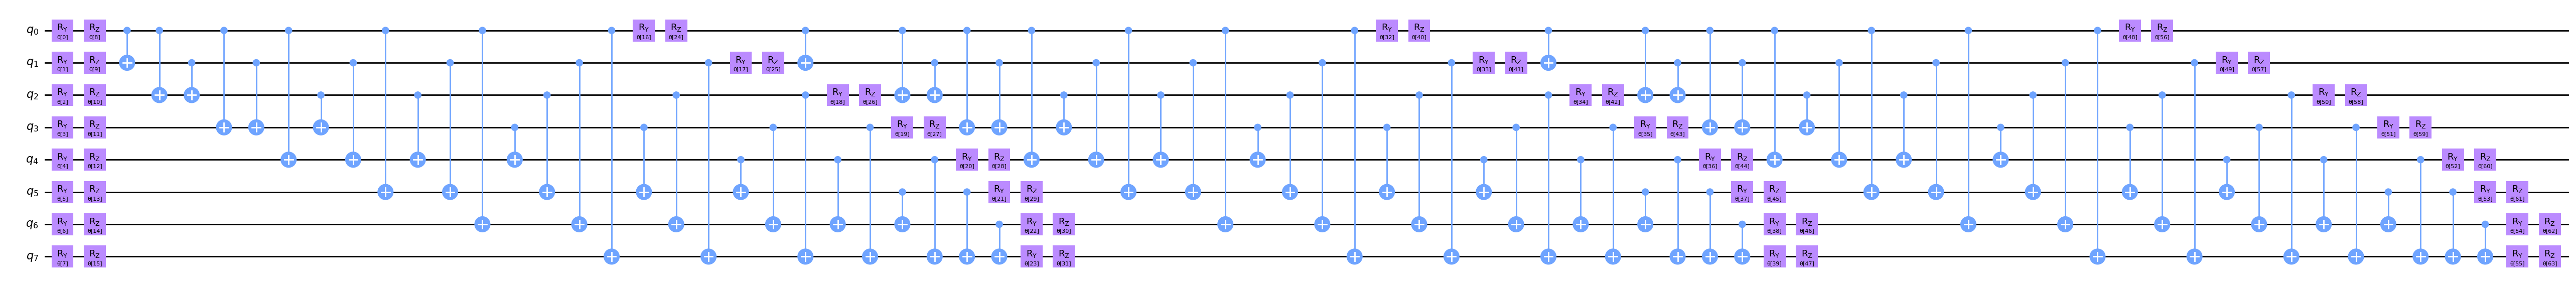

Exact Result: [-1.13722138]
VQE Result: [-1.04458133]
[[1, -1.0405192735581015], [2, -1.0114758395584578], [3, -1.046374395168488], [4, -1.015535441993665], [5, -1.0438833378350918], [6, -1.0190570118177735], [7, -1.006974683670713], [8, -1.0445813259845893]]
linear entanglement:


/home/riccardo/.venv/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


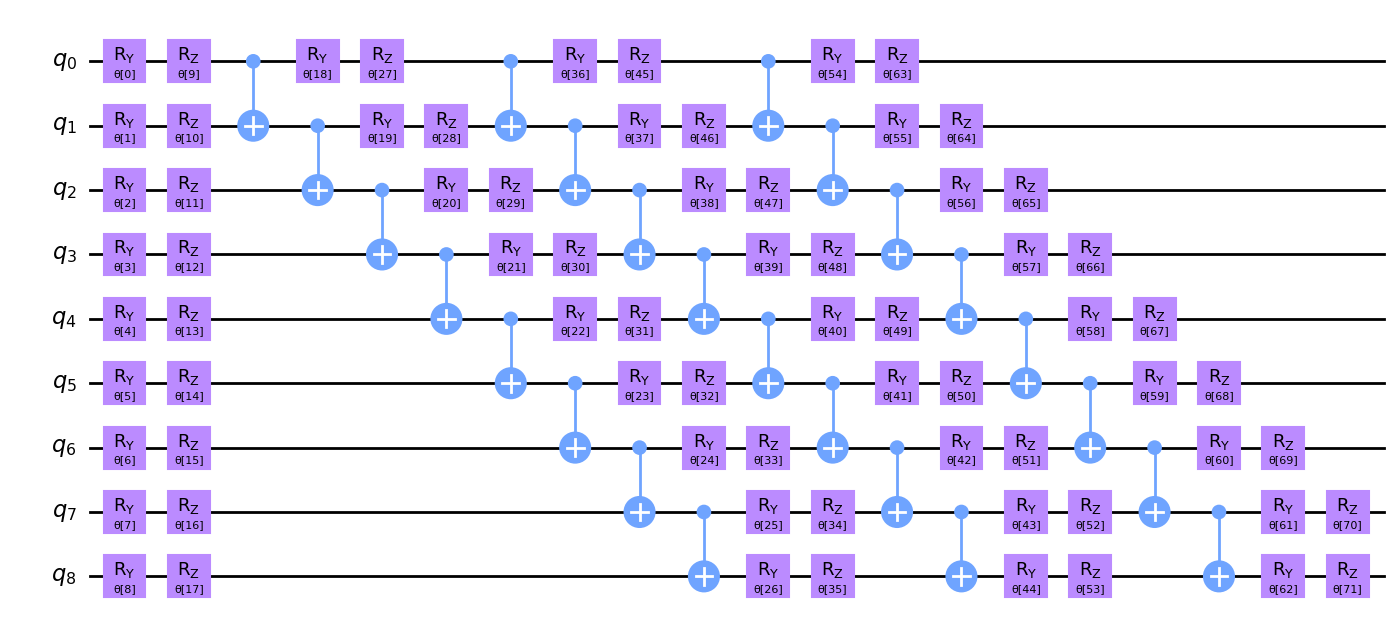

full entanglement:


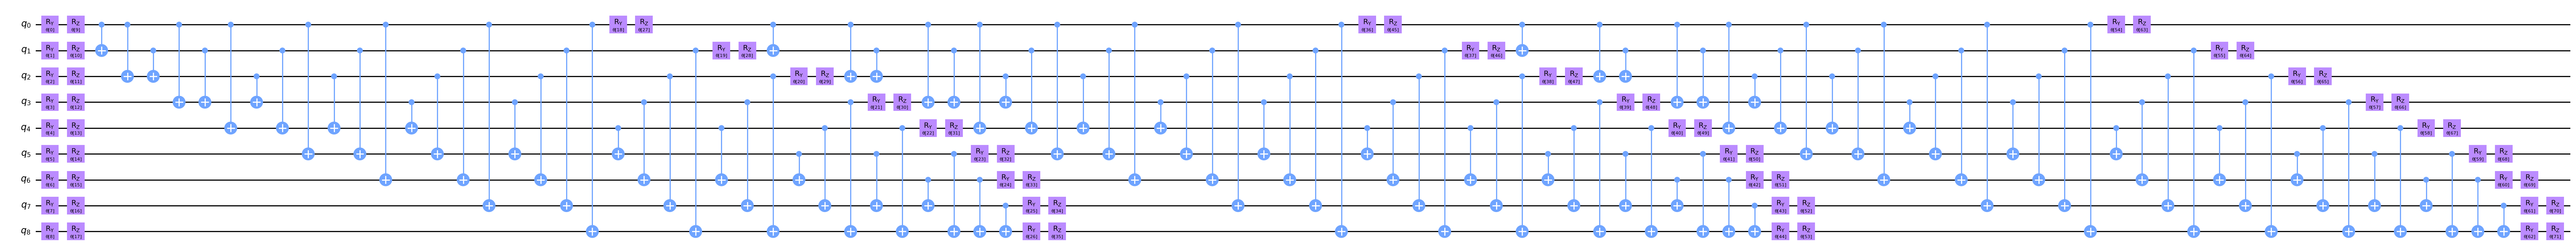

Exact Result: [-1.13722138]
VQE Result: [-1.01798419]
[[1, -1.0405192735581015], [2, -1.0114758395584578], [3, -1.046374395168488], [4, -1.015535441993665], [5, -1.0438833378350918], [6, -1.0190570118177735], [7, -1.006974683670713], [8, -1.0445813259845893], [9, -1.017984188754348]]
linear entanglement:


/home/riccardo/.venv/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


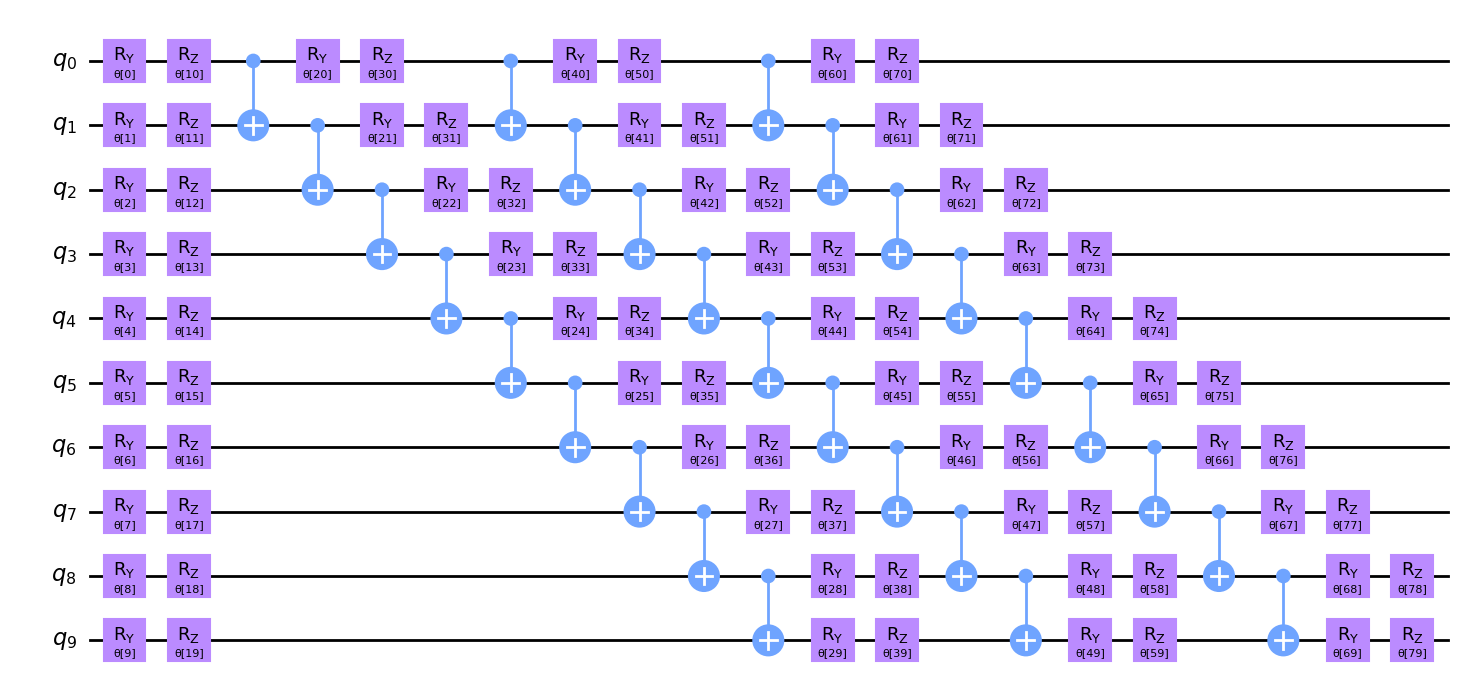

full entanglement:


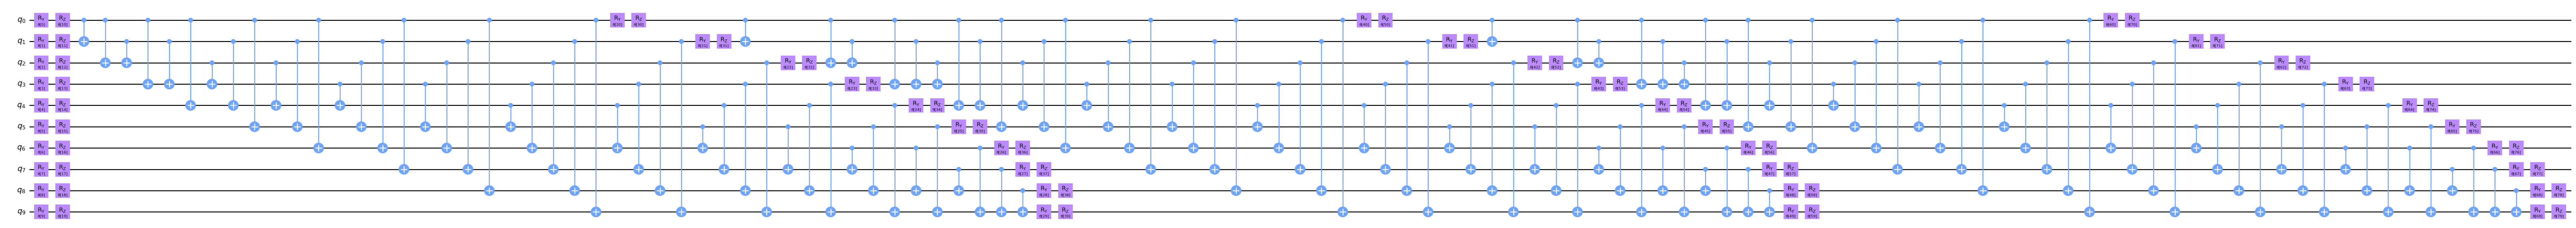

Exact Result: [-1.13722138]
VQE Result: [-1.01735919]
[[1, -1.0405192735581015], [2, -1.0114758395584578], [3, -1.046374395168488], [4, -1.015535441993665], [5, -1.0438833378350918], [6, -1.0190570118177735], [7, -1.006974683670713], [8, -1.0445813259845893], [9, -1.017984188754348], [10, -1.0173591928281274]]
linear entanglement:


/home/riccardo/.venv/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


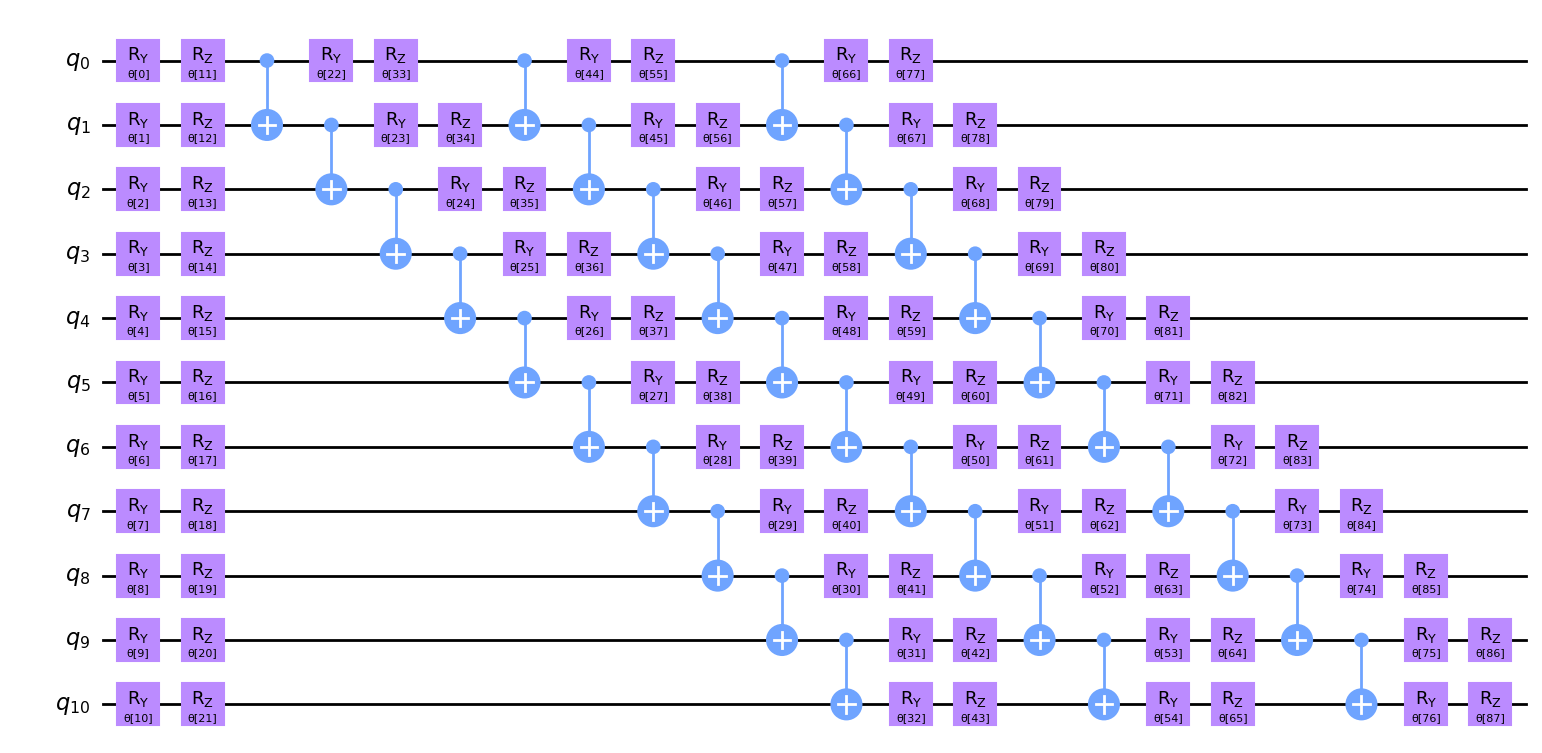

full entanglement:


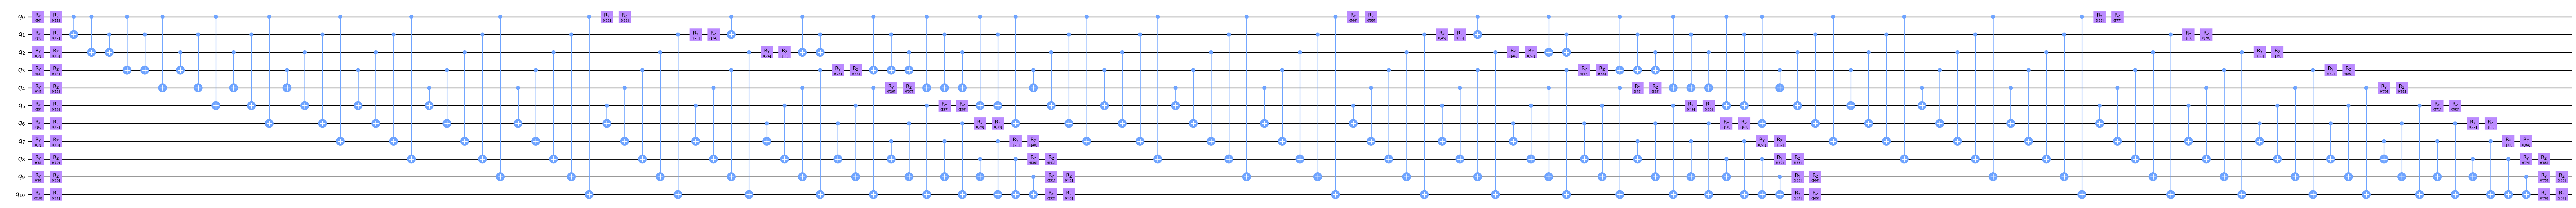

Exact Result: [-1.13722138]
VQE Result: [-1.04561229]
[[1, -1.0405192735581015], [2, -1.0114758395584578], [3, -1.046374395168488], [4, -1.015535441993665], [5, -1.0438833378350918], [6, -1.0190570118177735], [7, -1.006974683670713], [8, -1.0445813259845893], [9, -1.017984188754348], [10, -1.0173591928281274], [11, -1.0456122937302237]]
linear entanglement:


/home/riccardo/.venv/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


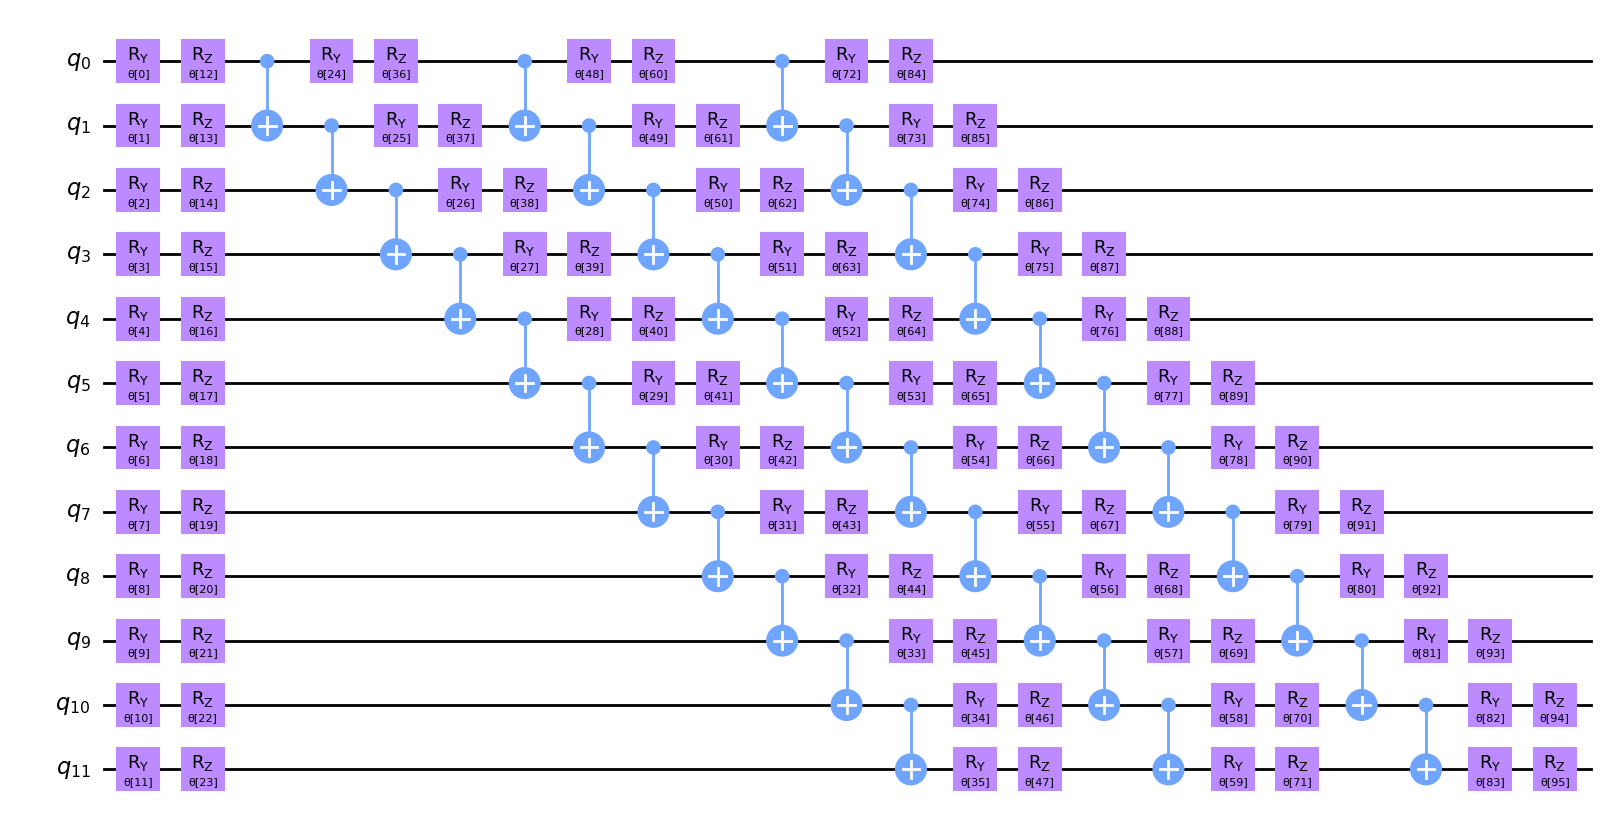

full entanglement:


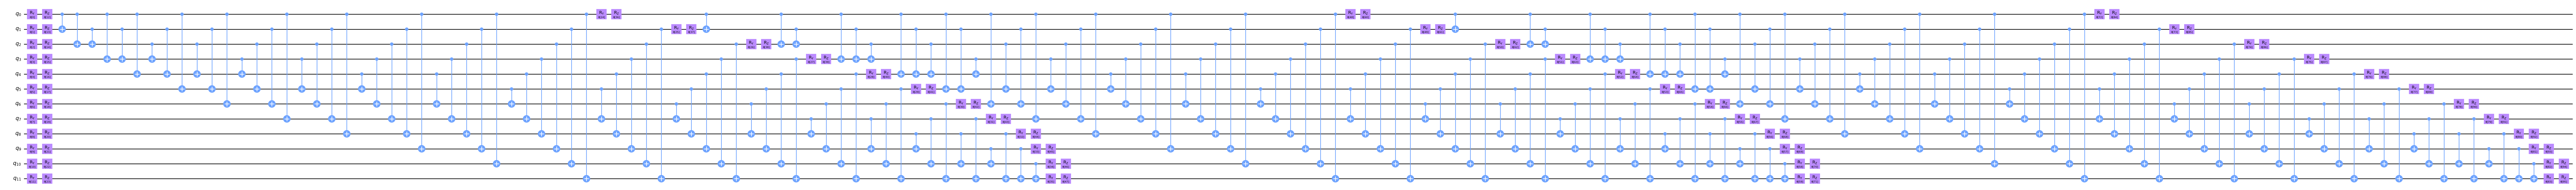

Exact Result: [-1.13722138]
VQE Result: [-1.02733342]
[[1, -1.0405192735581015], [2, -1.0114758395584578], [3, -1.046374395168488], [4, -1.015535441993665], [5, -1.0438833378350918], [6, -1.0190570118177735], [7, -1.006974683670713], [8, -1.0445813259845893], [9, -1.017984188754348], [10, -1.0173591928281274], [11, -1.0456122937302237], [12, -1.027333422238947]]


In [9]:
matrice = []
for i in range(1, 13):
    driver = PySCFDriver.from_molecule(molecule)
    problem = driver.run()
    
    second_q_ops = problem.second_q_ops()
    num_spatial_orbitals = problem.num_spatial_orbitals
    num_particles = problem.num_particles
    
    mapper = ParityMapper(num_particles=num_particles)  
    
    hamiltonian = second_q_ops[0]
    
    # Do two qubit reduction
    qubit_op = mapper.map(hamiltonian)
    
    from qiskit_aer.noise import NoiseModel
    from qiskit.providers.fake_provider import FakeVigo
    
    # fake providers contain data from real IBM Quantum devices stored
    # in Qiskit Terra, and are useful for extracting realistic noise models.
    
    device = FakeVigo()
    coupling_map = device.configuration().coupling_map
    noise_model = NoiseModel.from_backend(device)
    noisy_estimator = Estimator(
        backend_options={"coupling_map": coupling_map, "noise_model": noise_model}
    )
    from qiskit.circuit.library import EfficientSU2
    
    entanglements = ["linear", "full"]
    num_qubits=i
    for entanglement in entanglements:
        form = EfficientSU2(num_qubits, entanglement=entanglement)
        print(f"{entanglement} entanglement:")
        # We initialize all parameters to 0 for this demonstration
        display(form.decompose().draw("mpl", fold=-1))
    from qiskit_aer.primitives import Estimator
    
    
    def exact_solver(qubit_op, problem):
        sol = NumPyMinimumEigensolver().compute_minimum_eigenvalue(qubit_op)
        result = problem.interpret(sol)
        return result
    
    
    distances = np.arange(0.5, 4.0, 0.2)
    exact_energies = []
    vqe_energies = []
    result = exact_solver(qubit_op, problem)
    exact_energies.append(result.total_energies)
    print("Exact Result:", result.total_energies)
    optimizer = SPSA(maxiter=100)
    var_form = EfficientSU2(qubit_op.num_qubits, entanglement="linear") #prepare trial wave functions
    vqe = VQE(noisy_estimator, var_form, optimizer)
    vqe_calc = vqe.compute_minimum_eigenvalue(qubit_op)
    vqe_result = problem.interpret(vqe_calc).total_energies
    print("VQE Result:", vqe_result)
    matrice.append([num_qubits,vqe_result[0]])
    print(matrice)

[[ 1.         -1.04051927]
 [ 2.         -1.01147584]
 [ 3.         -1.0463744 ]
 [ 4.         -1.01553544]
 [ 5.         -1.04388334]
 [ 6.         -1.01905701]
 [ 7.         -1.00697468]
 [ 8.         -1.04458133]
 [ 9.         -1.01798419]
 [10.         -1.01735919]
 [11.         -1.04561229]
 [12.         -1.02733342]]


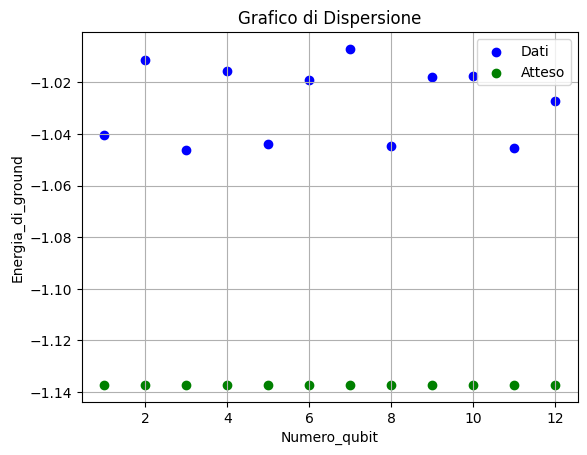

In [14]:
import matplotlib.pyplot as plt
import numpy as np
print(matrice)
atteso = []
for i in range(1, 13):
    atteso.append([i,-1.13722138])
matrice = np.array(matrice)
colonna_x = matrice[:, 0]
colonna_y = matrice[:, 1]
atteso = np.array(atteso)
Acolonna_x = atteso[:, 0]
Acolonna_y = atteso[:, 1]
plt.scatter(colonna_x, colonna_y, color='b', label='Dati')
plt.scatter(Acolonna_x, Acolonna_y, color='g', label='Atteso')
plt.title('Grafico di Dispersione')
plt.xlabel('Numero_qubit')
plt.ylabel('Energia_di_ground')
plt.legend()
plt.grid(True)
plt.show()

linear entanglement:


/home/riccardo/.venv/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


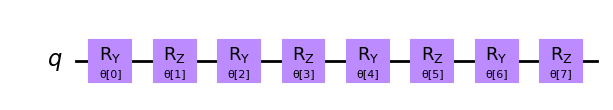

full entanglement:


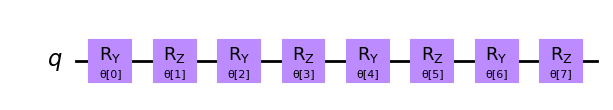

Exact Result: [-1.13722138]
VQE Result: [-0.8291083]
[[1, -0.8291083045802721]]
linear entanglement:


/home/riccardo/.venv/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


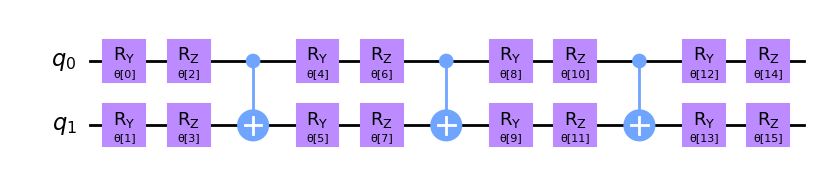

full entanglement:


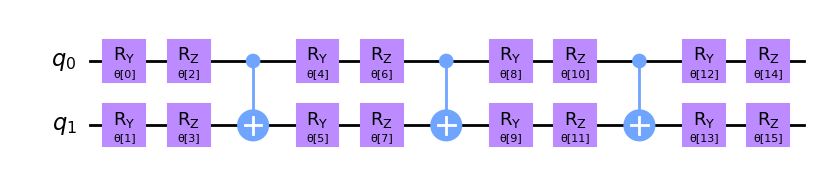

Exact Result: [-1.13722138]
VQE Result: [-0.93026383]
[[1, -0.8291083045802721], [2, -0.930263825529916]]
linear entanglement:


/home/riccardo/.venv/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


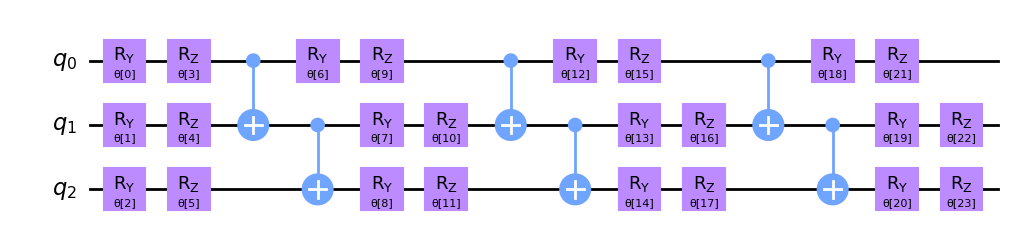

full entanglement:


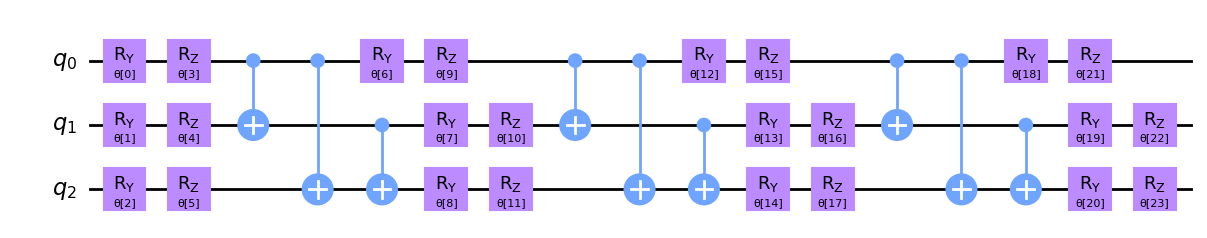

Exact Result: [-1.13722138]
VQE Result: [-0.65440715]
[[1, -0.8291083045802721], [2, -0.930263825529916], [3, -0.6544071537774656]]
linear entanglement:


/home/riccardo/.venv/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


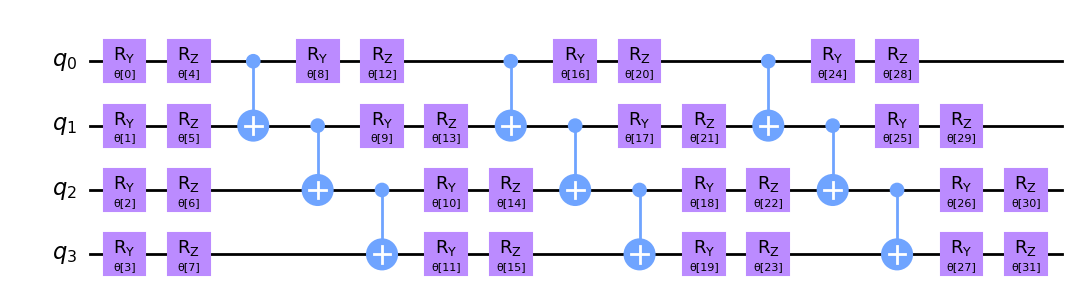

full entanglement:


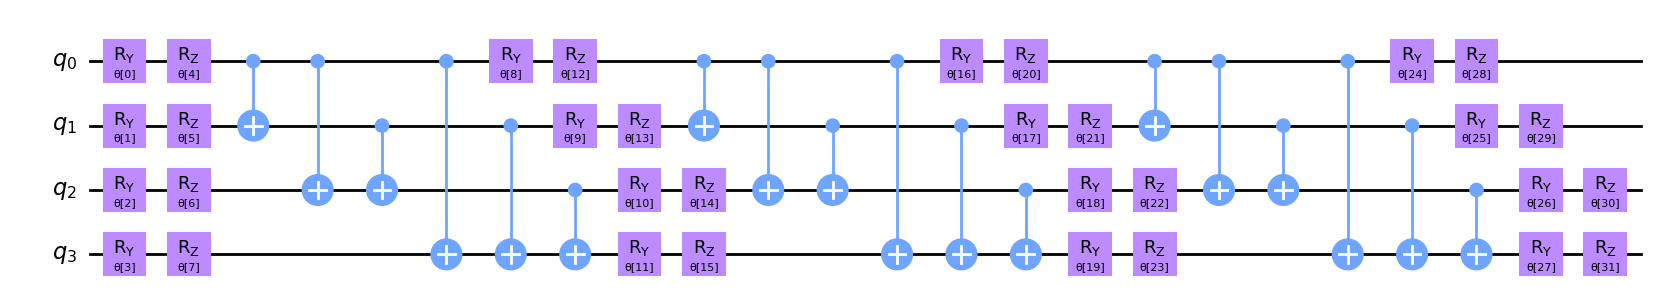

Exact Result: [-1.13722138]
VQE Result: [-0.97655027]
[[1, -0.8291083045802721], [2, -0.930263825529916], [3, -0.6544071537774656], [4, -0.9765502676599929]]
linear entanglement:


/home/riccardo/.venv/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


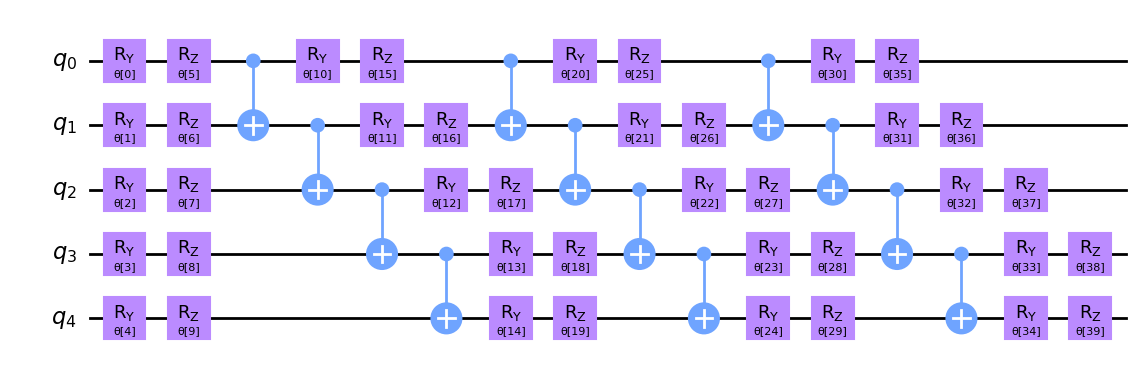

full entanglement:


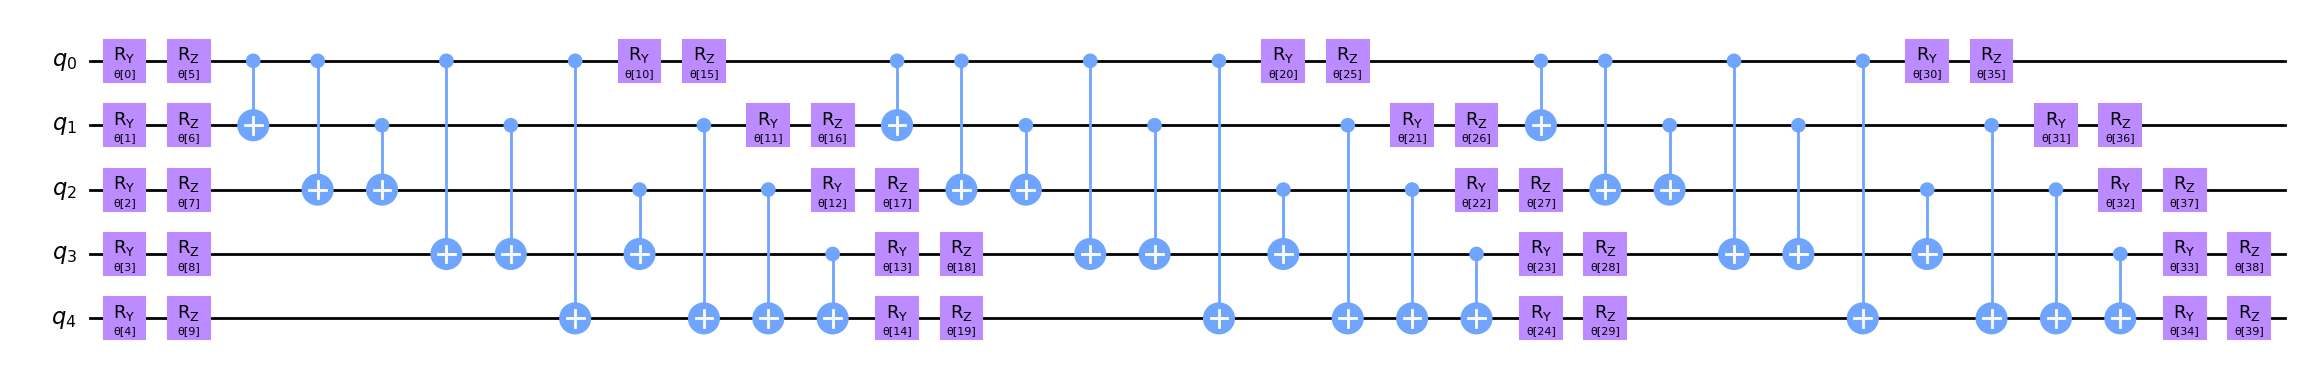

Exact Result: [-1.13722138]
VQE Result: [-0.96668564]
[[1, -0.8291083045802721], [2, -0.930263825529916], [3, -0.6544071537774656], [4, -0.9765502676599929], [5, -0.9666856438728688]]
linear entanglement:


/home/riccardo/.venv/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


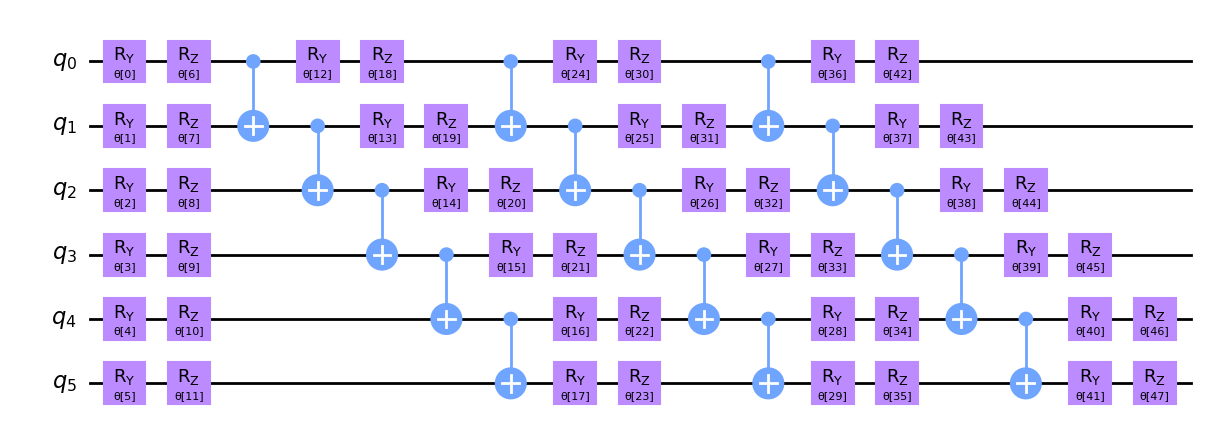

full entanglement:


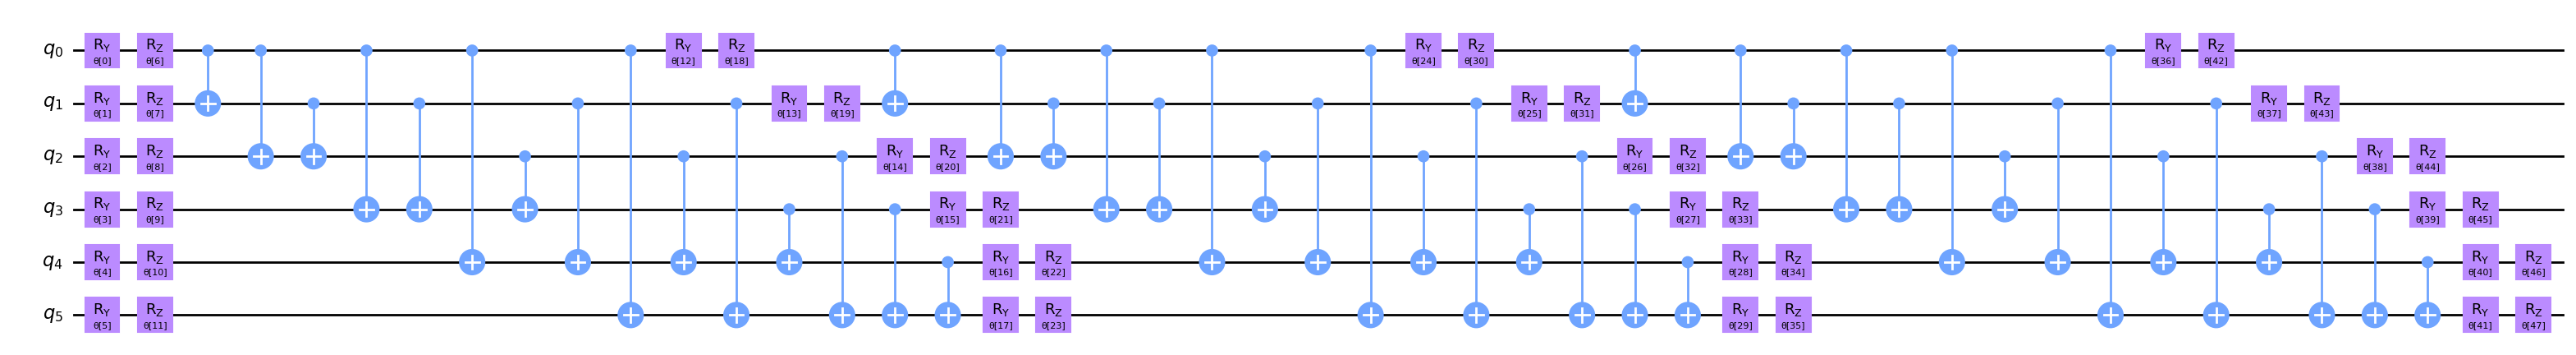

Exact Result: [-1.13722138]
VQE Result: [-0.98190013]
[[1, -0.8291083045802721], [2, -0.930263825529916], [3, -0.6544071537774656], [4, -0.9765502676599929], [5, -0.9666856438728688], [6, -0.9819001348968117]]
linear entanglement:


/home/riccardo/.venv/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


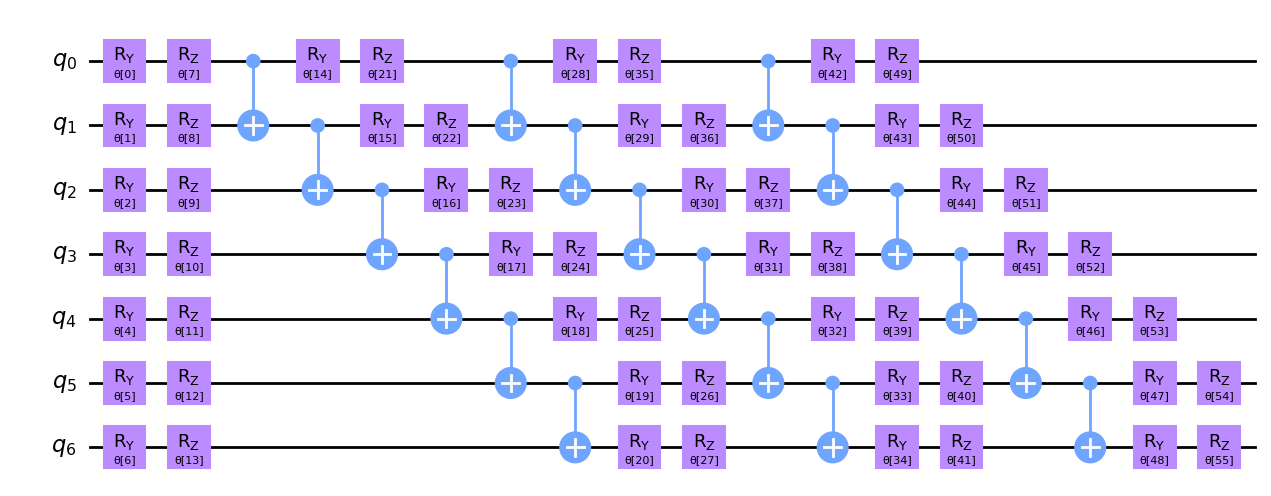

full entanglement:


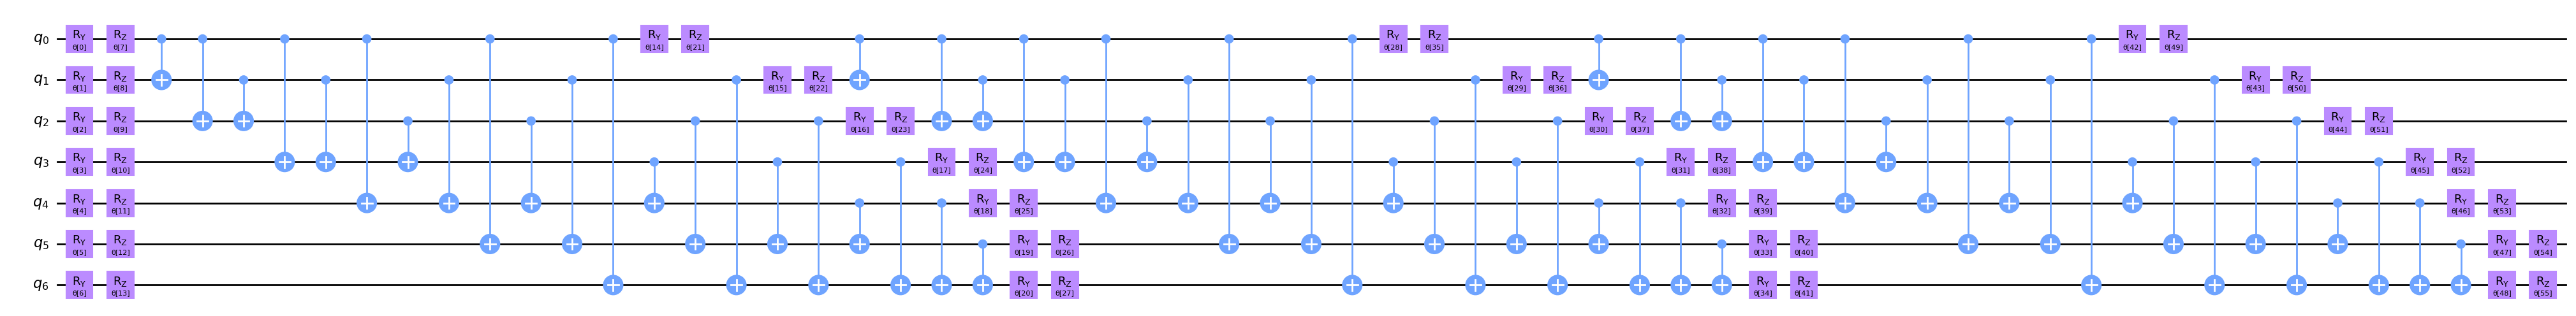

Exact Result: [-1.13722138]
VQE Result: [-1.00888894]
[[1, -0.8291083045802721], [2, -0.930263825529916], [3, -0.6544071537774656], [4, -0.9765502676599929], [5, -0.9666856438728688], [6, -0.9819001348968117], [7, -1.0088889416465876]]
linear entanglement:


/home/riccardo/.venv/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


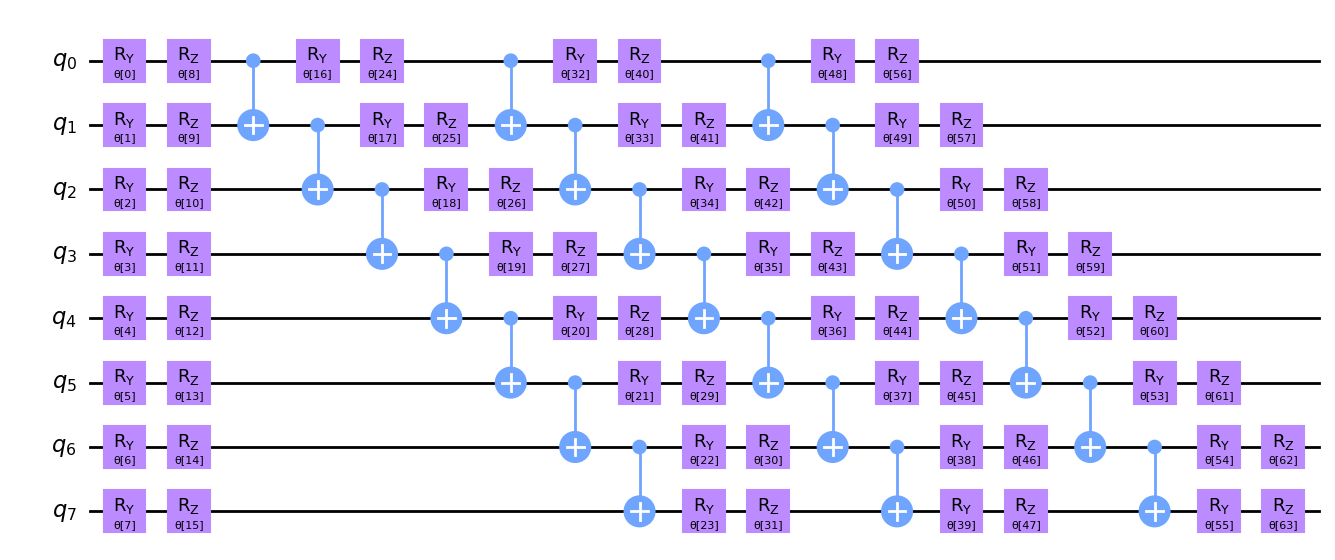

full entanglement:


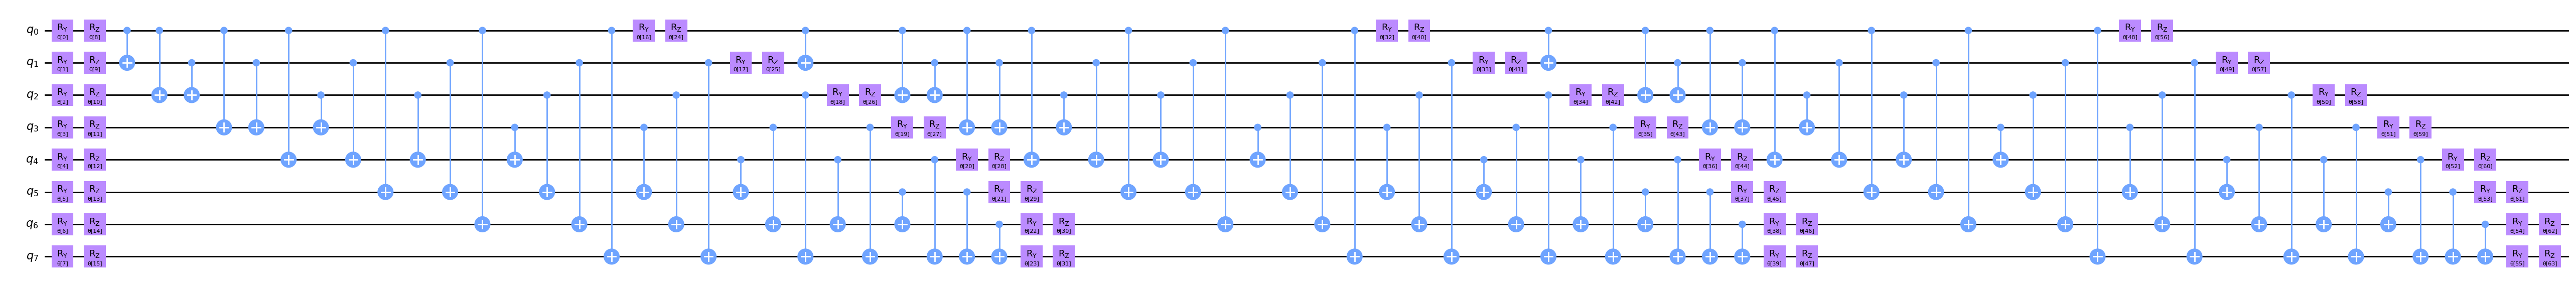

Exact Result: [-1.13722138]
VQE Result: [-0.91895852]
[[1, -0.8291083045802721], [2, -0.930263825529916], [3, -0.6544071537774656], [4, -0.9765502676599929], [5, -0.9666856438728688], [6, -0.9819001348968117], [7, -1.0088889416465876], [8, -0.91895852170979]]
linear entanglement:


/home/riccardo/.venv/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


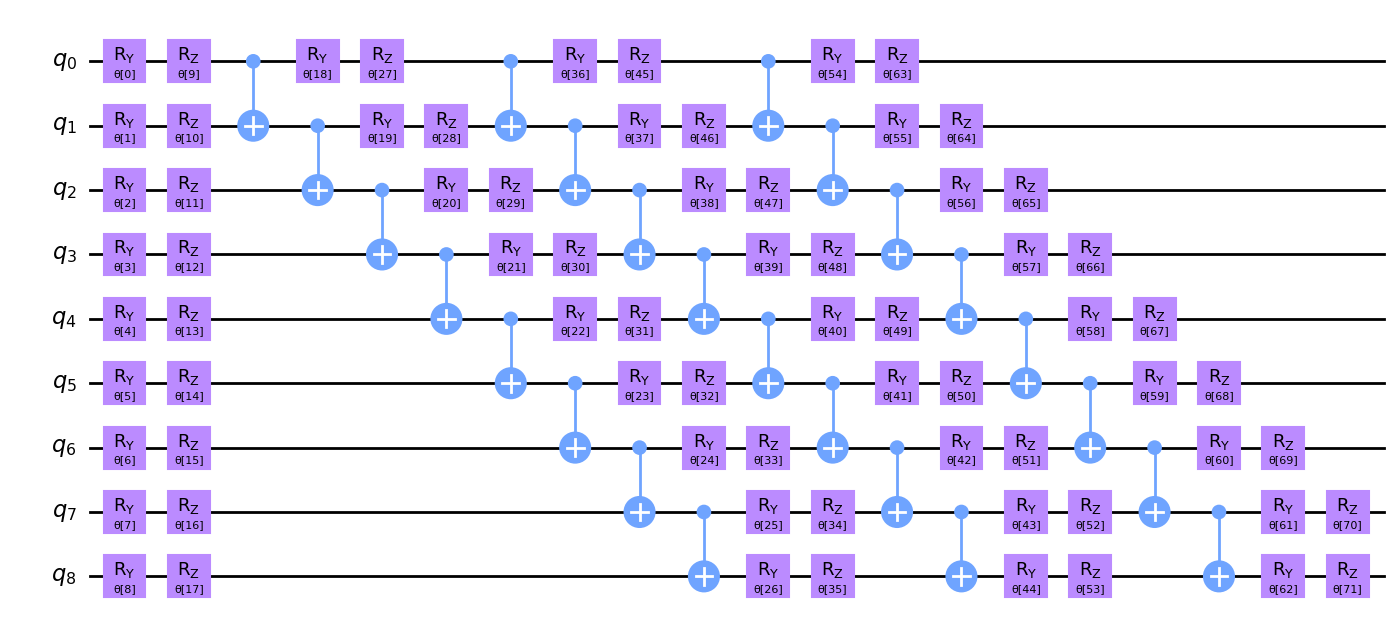

full entanglement:


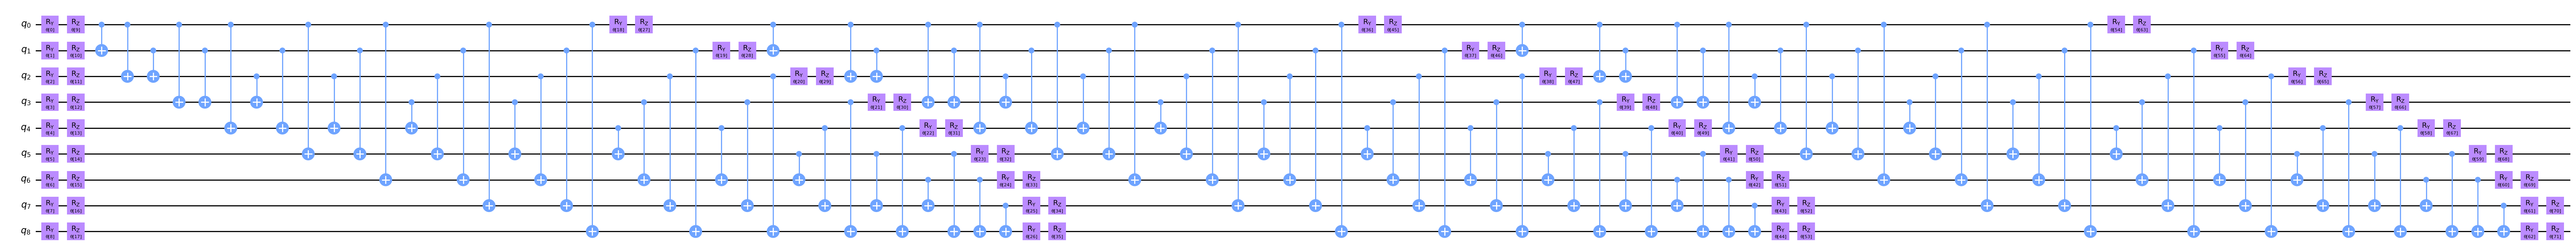

Exact Result: [-1.13722138]
VQE Result: [-0.96940258]
[[1, -0.8291083045802721], [2, -0.930263825529916], [3, -0.6544071537774656], [4, -0.9765502676599929], [5, -0.9666856438728688], [6, -0.9819001348968117], [7, -1.0088889416465876], [8, -0.91895852170979], [9, -0.9694025846523784]]
linear entanglement:


/home/riccardo/.venv/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


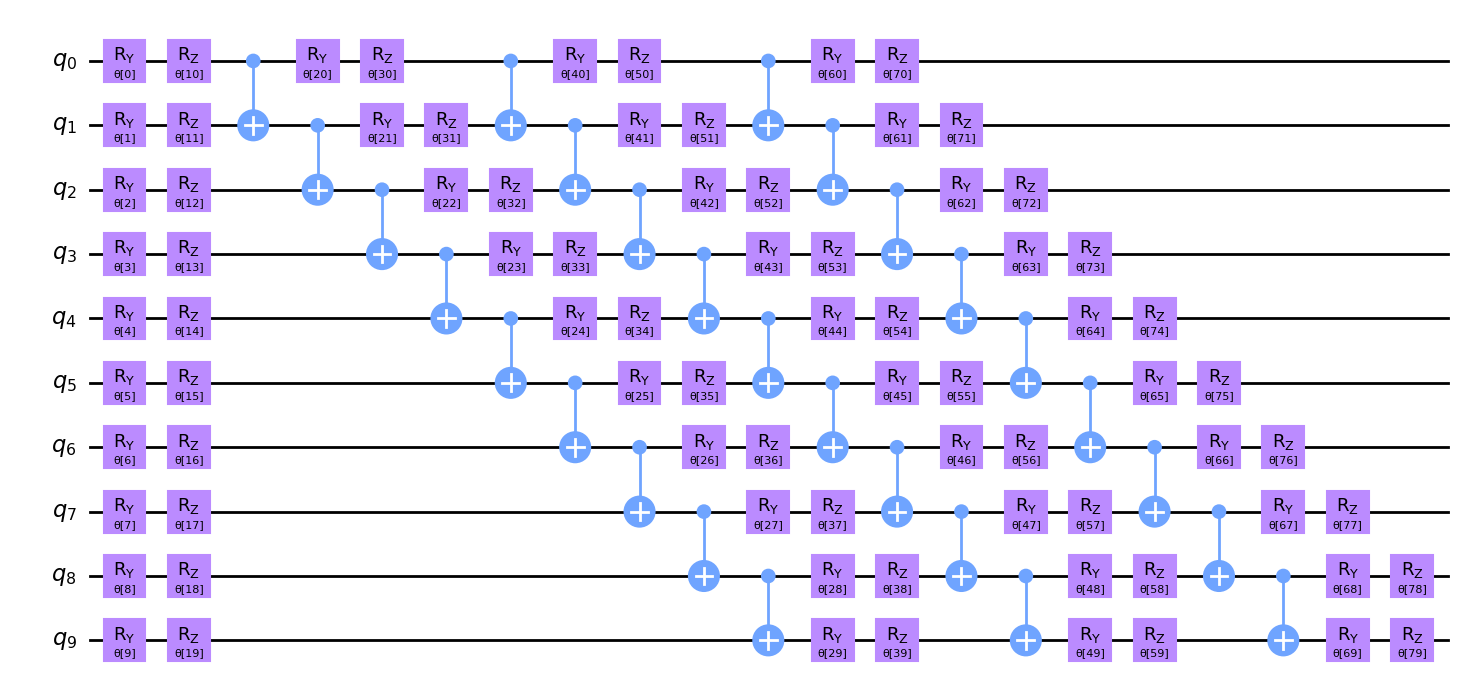

full entanglement:


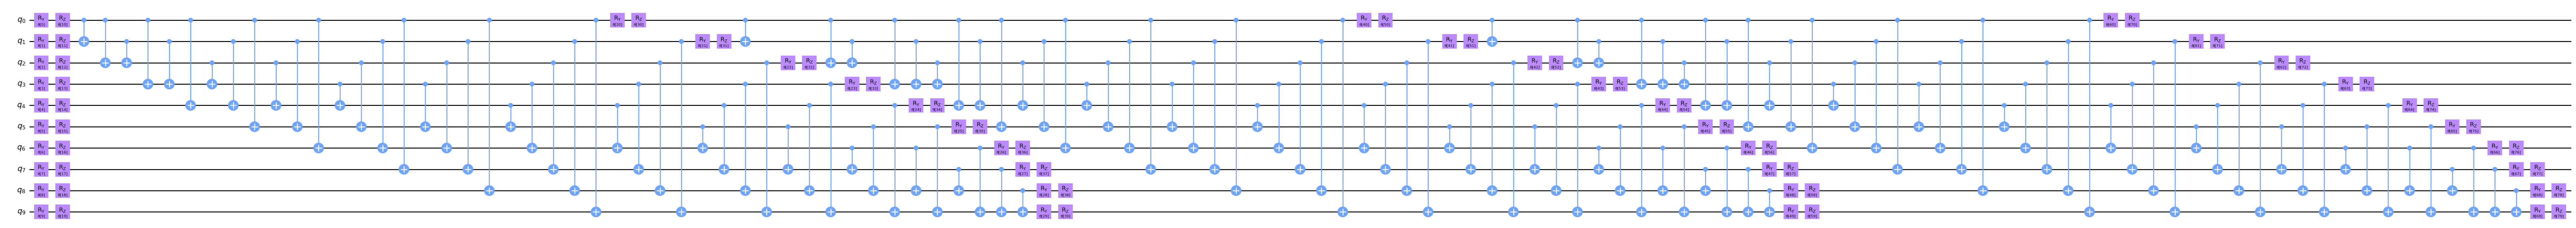

Exact Result: [-1.13722138]
VQE Result: [-0.93510679]
[[1, -0.8291083045802721], [2, -0.930263825529916], [3, -0.6544071537774656], [4, -0.9765502676599929], [5, -0.9666856438728688], [6, -0.9819001348968117], [7, -1.0088889416465876], [8, -0.91895852170979], [9, -0.9694025846523784], [10, -0.9351067928803507]]
linear entanglement:


/home/riccardo/.venv/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


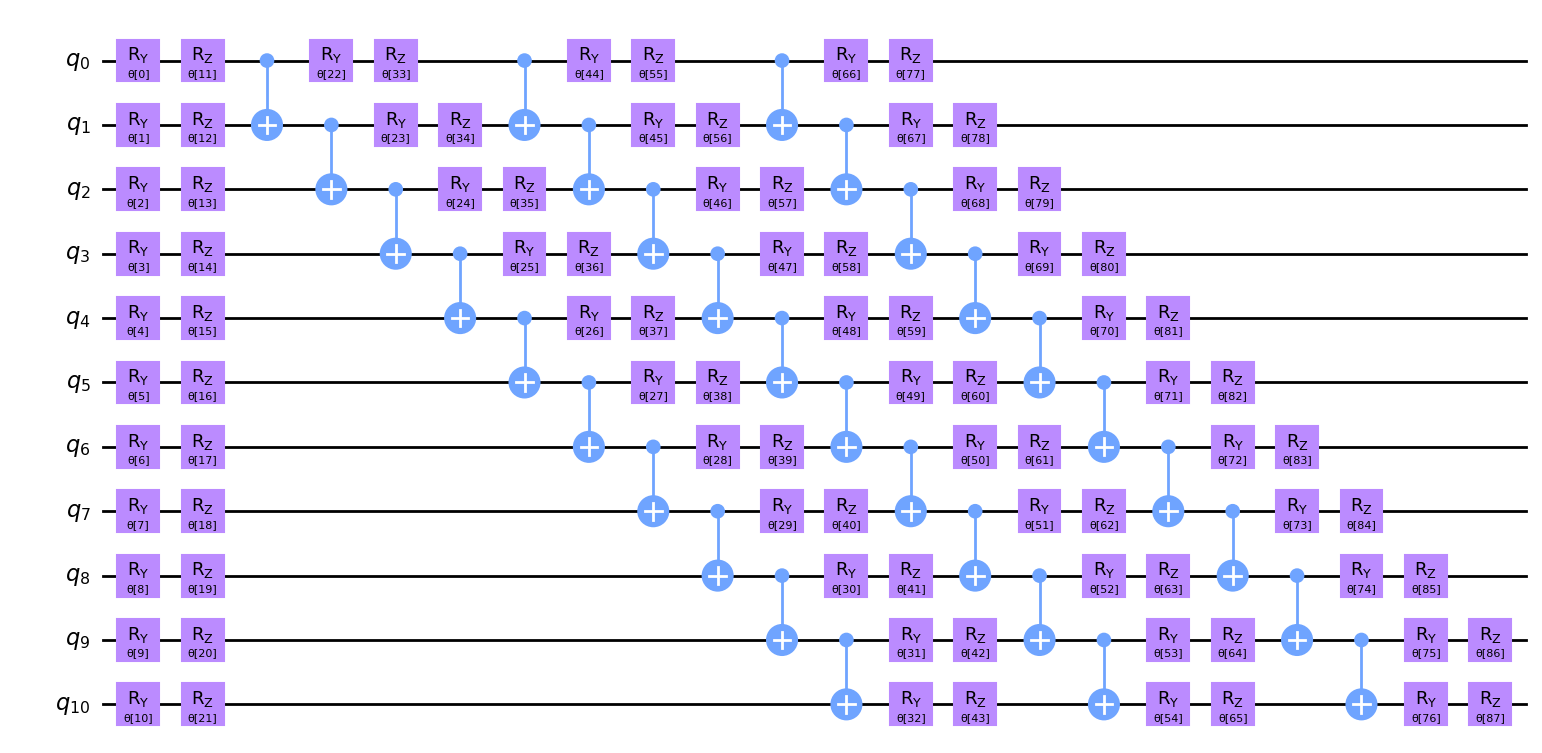

full entanglement:


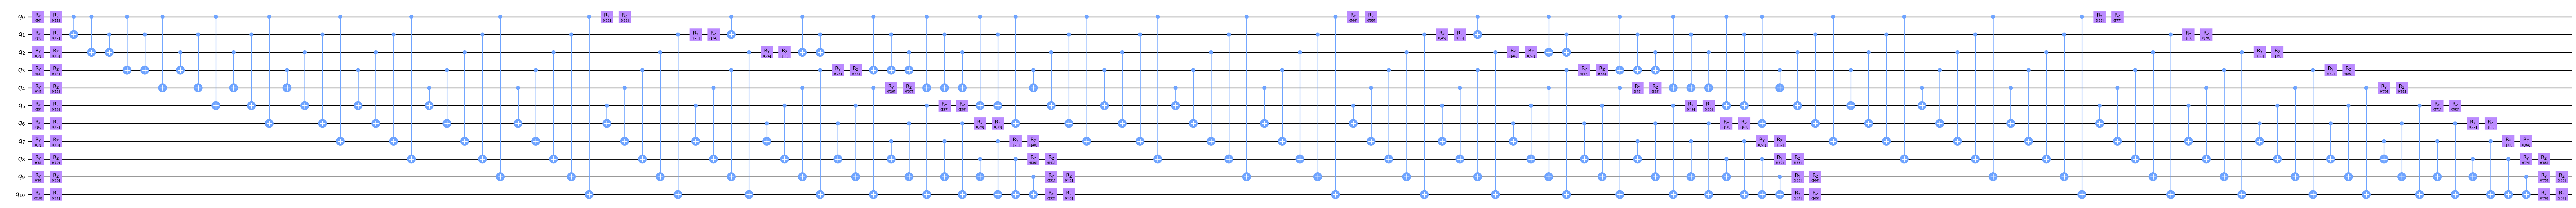

Exact Result: [-1.13722138]
VQE Result: [-0.9736798]
[[1, -0.8291083045802721], [2, -0.930263825529916], [3, -0.6544071537774656], [4, -0.9765502676599929], [5, -0.9666856438728688], [6, -0.9819001348968117], [7, -1.0088889416465876], [8, -0.91895852170979], [9, -0.9694025846523784], [10, -0.9351067928803507], [11, -0.9736797996124316]]
linear entanglement:


/home/riccardo/.venv/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


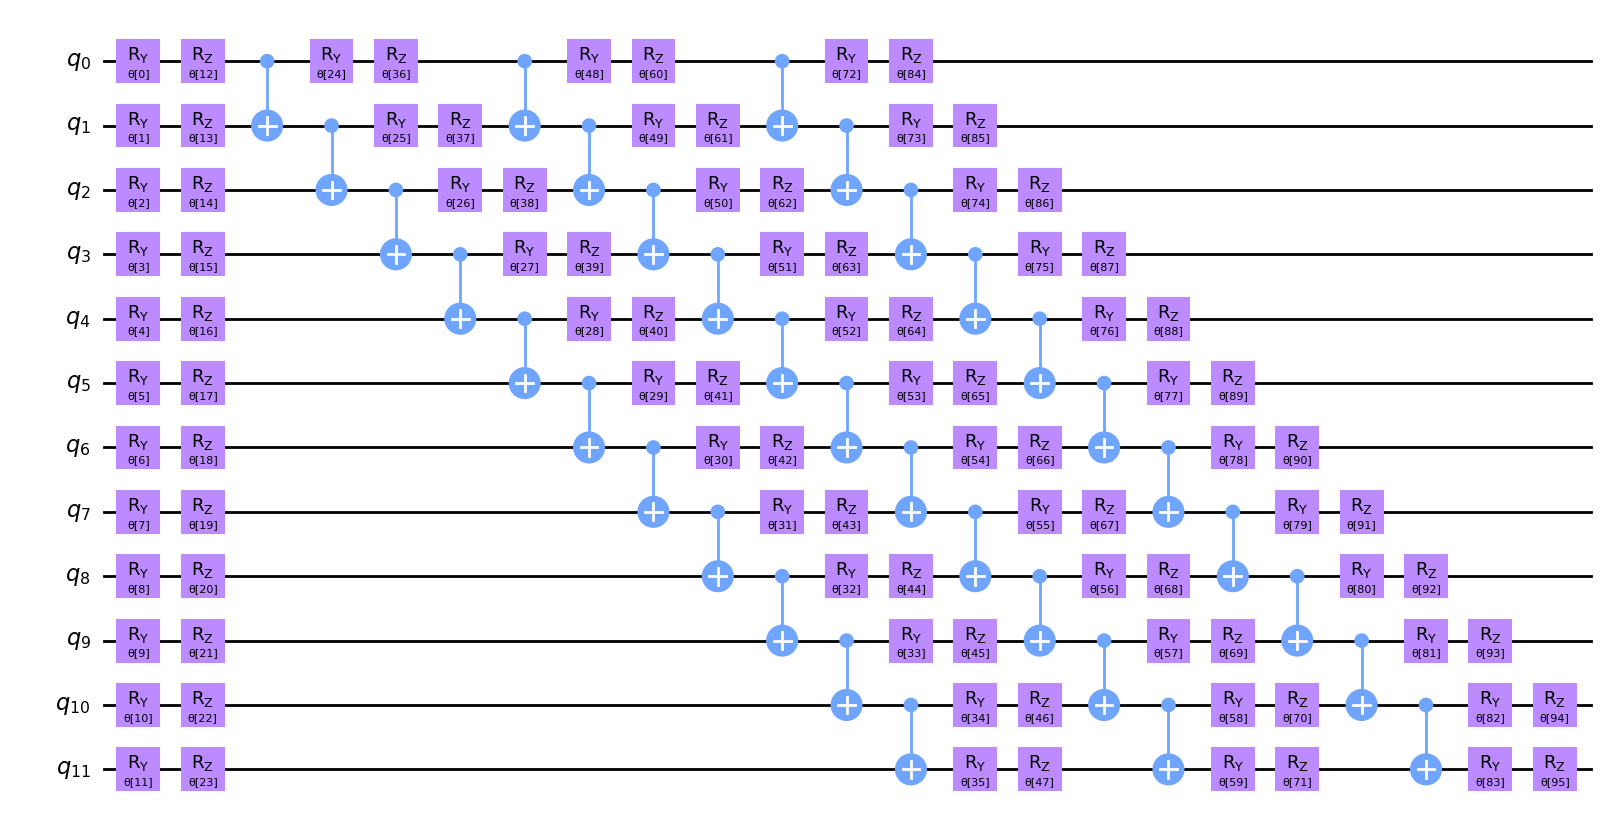

full entanglement:


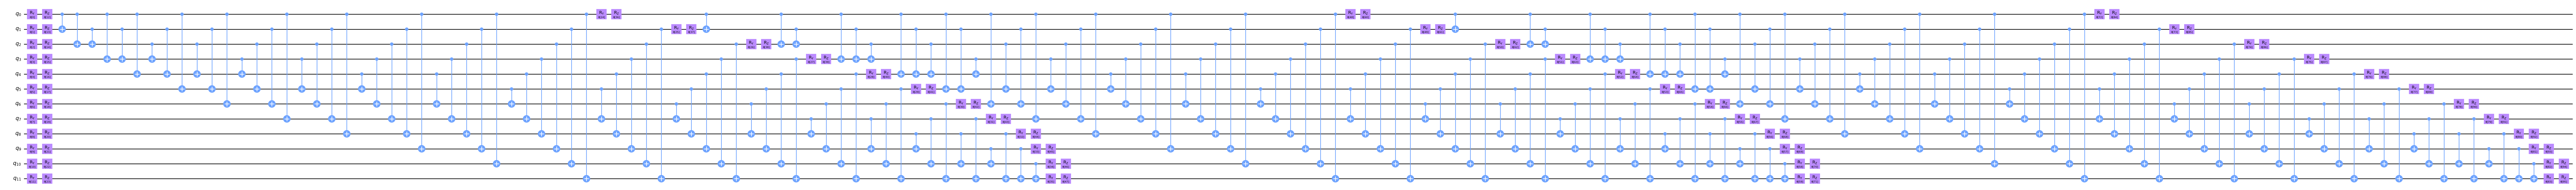

Exact Result: [-1.13722138]
VQE Result: [-0.98286825]
[[1, -0.8291083045802721], [2, -0.930263825529916], [3, -0.6544071537774656], [4, -0.9765502676599929], [5, -0.9666856438728688], [6, -0.9819001348968117], [7, -1.0088889416465876], [8, -0.91895852170979], [9, -0.9694025846523784], [10, -0.9351067928803507], [11, -0.9736797996124316], [12, -0.9828682507328577]]


In [20]:
from qiskit_nature.second_q.mappers import JordanWignerMapper
matrice = []
for i in range(1, 13):
    driver = PySCFDriver.from_molecule(molecule)
    problem = driver.run()
    
    second_q_ops = problem.second_q_ops()
    num_spatial_orbitals = problem.num_spatial_orbitals
    num_particles = problem.num_particles
    
    mapper = JordanWignerMapper()  
    
    hamiltonian = second_q_ops[0]
    
    # Do two qubit reduction
    qubit_op = mapper.map(hamiltonian)
    
    from qiskit_aer.noise import NoiseModel
    from qiskit.providers.fake_provider import FakeVigo
    
    # fake providers contain data from real IBM Quantum devices stored
    # in Qiskit Terra, and are useful for extracting realistic noise models.
    
    device = FakeVigo()
    coupling_map = device.configuration().coupling_map
    noise_model = NoiseModel.from_backend(device)
    noisy_estimator = Estimator(
        backend_options={"coupling_map": coupling_map, "noise_model": noise_model}
    )
    from qiskit.circuit.library import EfficientSU2
    
    entanglements = ["linear", "full"]
    num_qubits=i
    for entanglement in entanglements:
        form = EfficientSU2(num_qubits, entanglement=entanglement)
        print(f"{entanglement} entanglement:")
        # We initialize all parameters to 0 for this demonstration
        display(form.decompose().draw("mpl", fold=-1))
    from qiskit_aer.primitives import Estimator
    
    
    def exact_solver(qubit_op, problem):
        sol = NumPyMinimumEigensolver().compute_minimum_eigenvalue(qubit_op)
        result = problem.interpret(sol)
        return result
    
    
    distances = np.arange(0.5, 4.0, 0.2)
    exact_energies = []
    vqe_energies = []
    result = exact_solver(qubit_op, problem)
    exact_energies.append(result.total_energies)
    print("Exact Result:", result.total_energies)
    optimizer = SPSA(maxiter=100)
    var_form = EfficientSU2(qubit_op.num_qubits, entanglement="linear") #prepare trial wave functions
    vqe = VQE(noisy_estimator, var_form, optimizer)
    vqe_calc = vqe.compute_minimum_eigenvalue(qubit_op)
    vqe_result = problem.interpret(vqe_calc).total_energies
    print("VQE Result:", vqe_result)
    matrice.append([num_qubits,vqe_result[0]])
    print(matrice)

[[1, -0.8291083045802721], [2, -0.930263825529916], [3, -0.6544071537774656], [4, -0.9765502676599929], [5, -0.9666856438728688], [6, -0.9819001348968117], [7, -1.0088889416465876], [8, -0.91895852170979], [9, -0.9694025846523784], [10, -0.9351067928803507], [11, -0.9736797996124316], [12, -0.9828682507328577]]


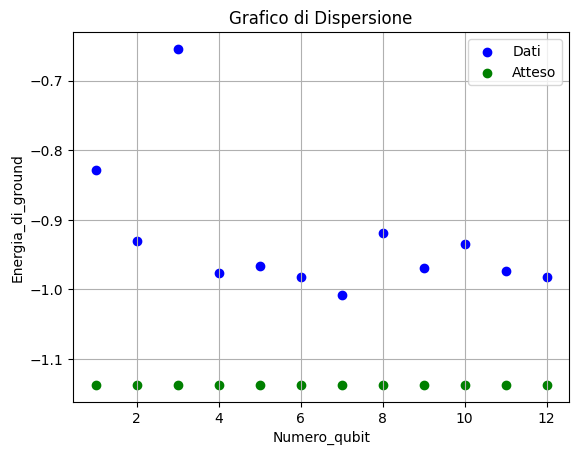

In [21]:
import matplotlib.pyplot as plt
import numpy as np
print(matrice)
atteso = []
for i in range(1, 13):
    atteso.append([i,-1.13722138])
matrice = np.array(matrice)
colonna_x = matrice[:, 0]
colonna_y = matrice[:, 1]
atteso = np.array(atteso)
Acolonna_x = atteso[:, 0]
Acolonna_y = atteso[:, 1]
plt.scatter(colonna_x, colonna_y, color='b', label='Dati')
plt.scatter(Acolonna_x, Acolonna_y, color='g', label='Atteso')
plt.title('Grafico di Dispersione')
plt.xlabel('Numero_qubit')
plt.ylabel('Energia_di_ground')
plt.legend()
plt.grid(True)
plt.show()

linear entanglement:


/home/riccardo/.venv/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


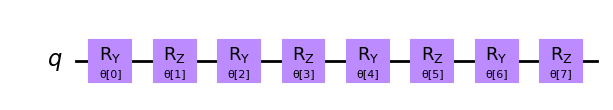

full entanglement:


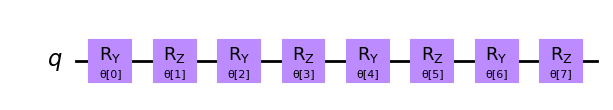

Exact Result: [-1.13722138]
VQE Result: [-0.89474998]
[[1, -0.8947499782409347]]
linear entanglement:


/home/riccardo/.venv/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


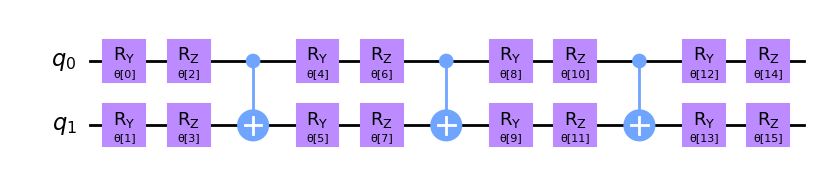

full entanglement:


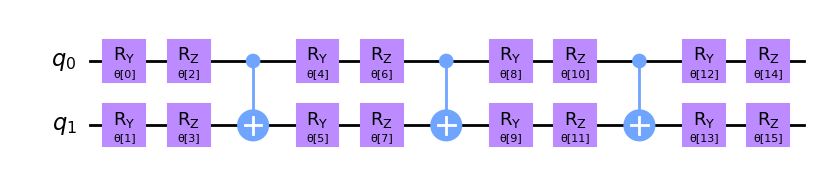

Exact Result: [-1.13722138]
VQE Result: [-0.88976893]
[[1, -0.8947499782409347], [2, -0.889768925673613]]
linear entanglement:


/home/riccardo/.venv/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


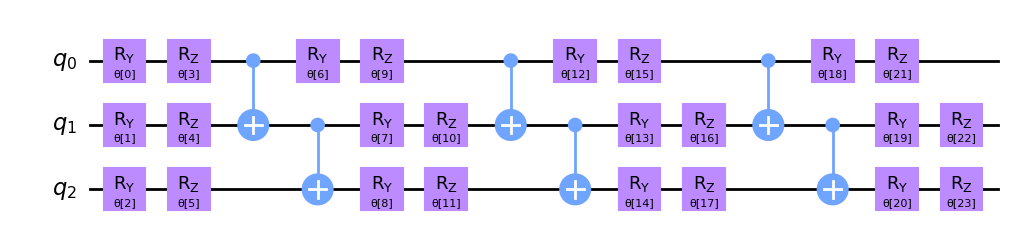

full entanglement:


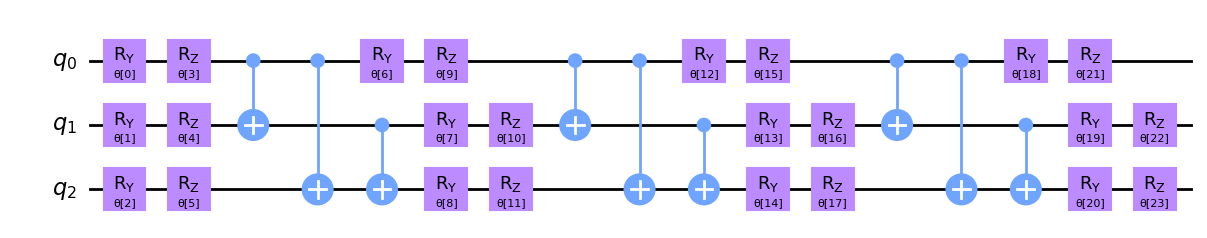

Exact Result: [-1.13722138]
VQE Result: [-0.80432122]
[[1, -0.8947499782409347], [2, -0.889768925673613], [3, -0.8043212197188598]]
linear entanglement:


/home/riccardo/.venv/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


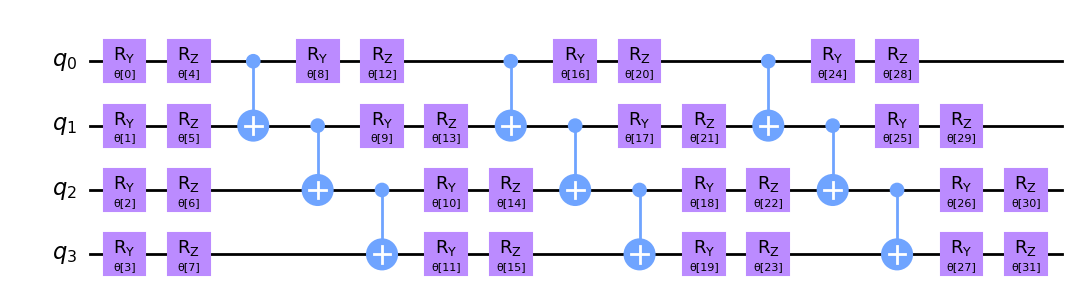

full entanglement:


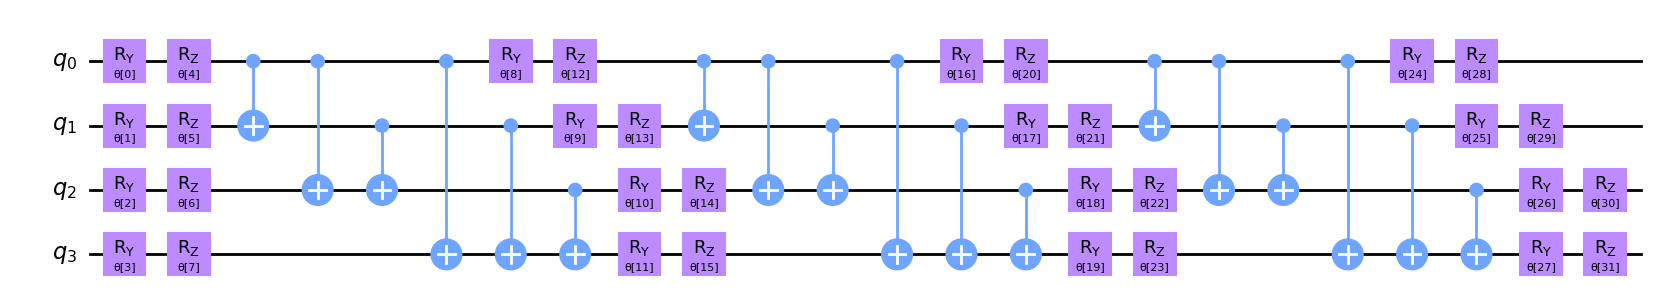

Exact Result: [-1.13722138]
VQE Result: [-0.79294027]
[[1, -0.8947499782409347], [2, -0.889768925673613], [3, -0.8043212197188598], [4, -0.792940267467314]]
linear entanglement:


/home/riccardo/.venv/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


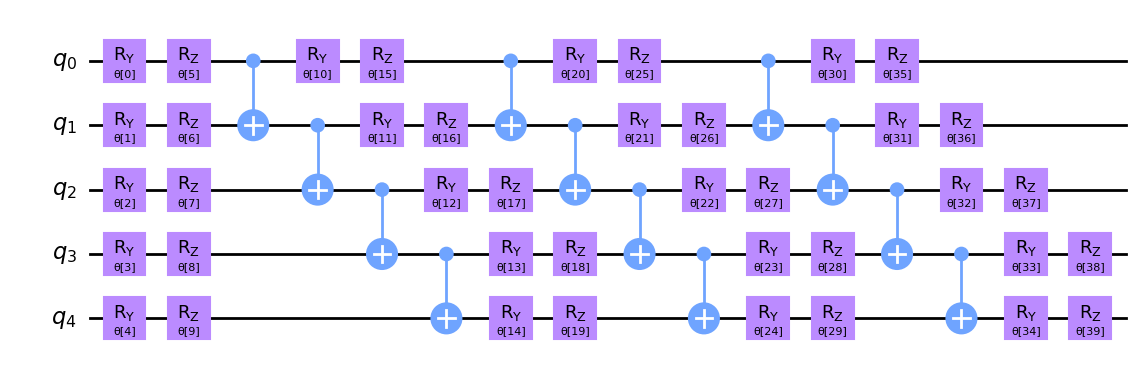

full entanglement:


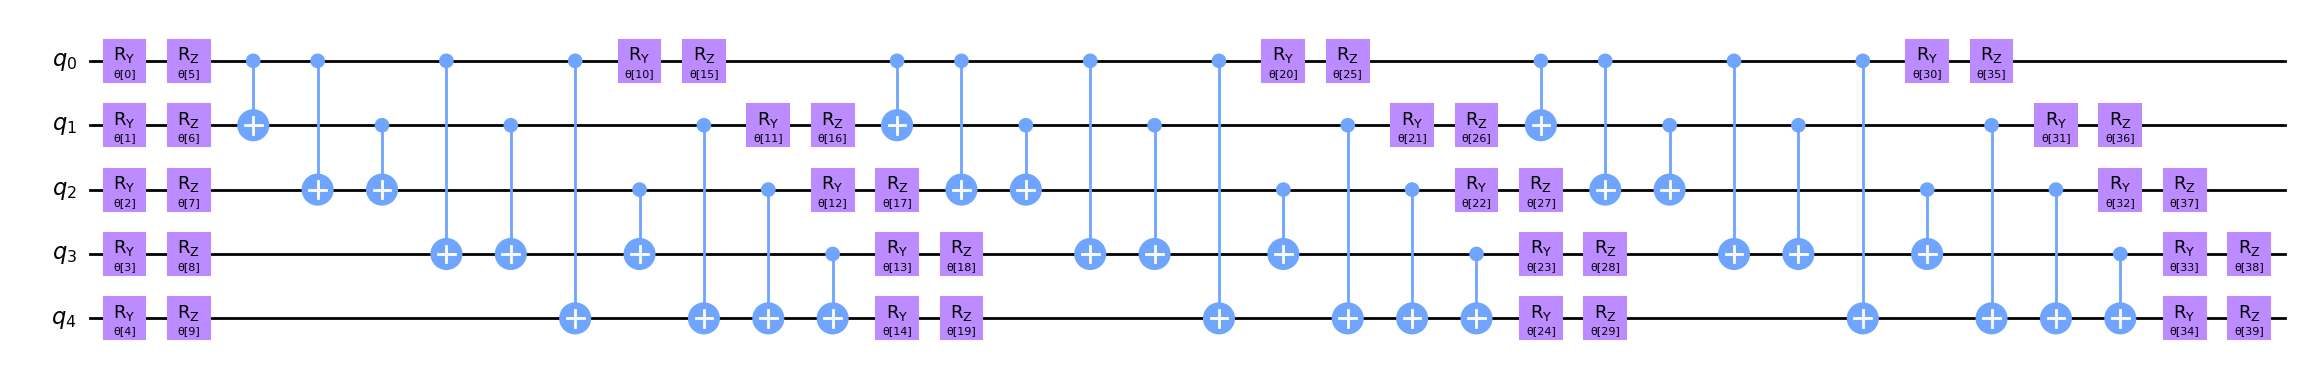

Exact Result: [-1.13722138]
VQE Result: [-0.95492526]
[[1, -0.8947499782409347], [2, -0.889768925673613], [3, -0.8043212197188598], [4, -0.792940267467314], [5, -0.9549252573658307]]
linear entanglement:


/home/riccardo/.venv/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


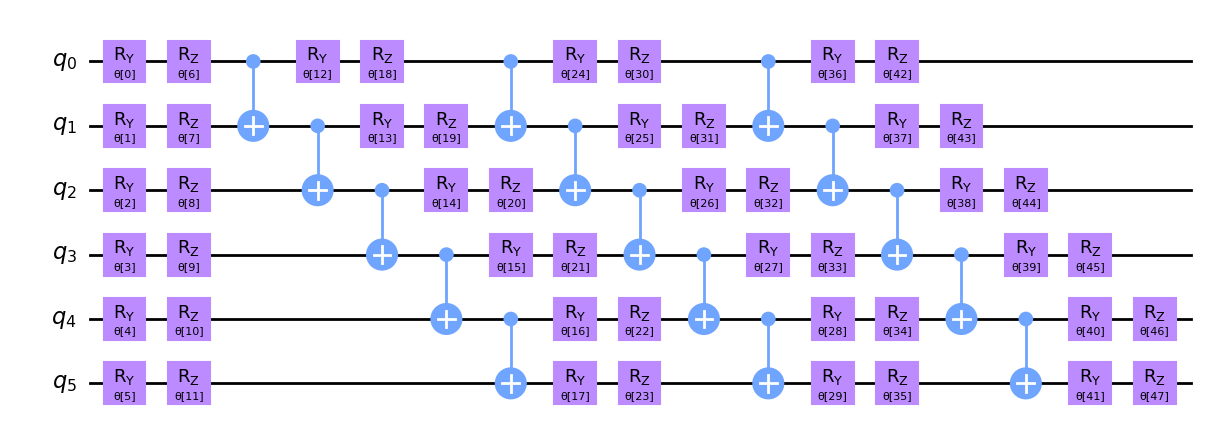

full entanglement:


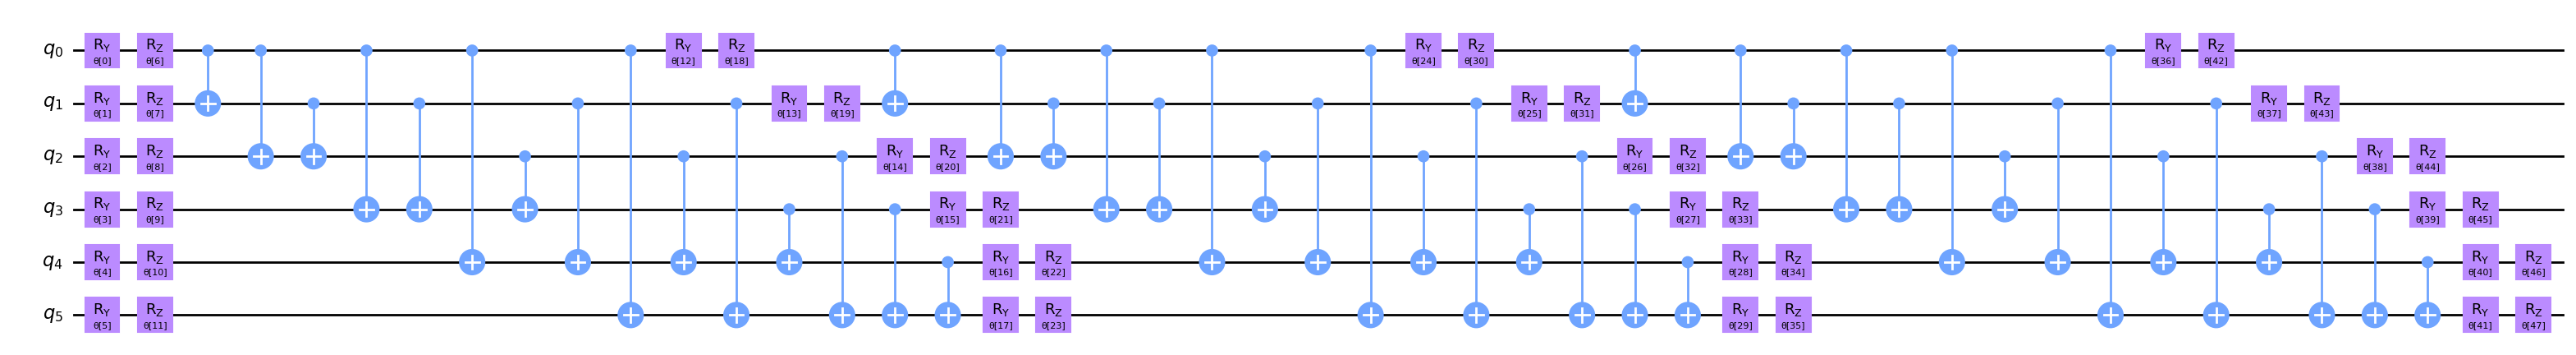

Exact Result: [-1.13722138]
VQE Result: [-0.7623104]
[[1, -0.8947499782409347], [2, -0.889768925673613], [3, -0.8043212197188598], [4, -0.792940267467314], [5, -0.9549252573658307], [6, -0.7623103987202788]]
linear entanglement:


/home/riccardo/.venv/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


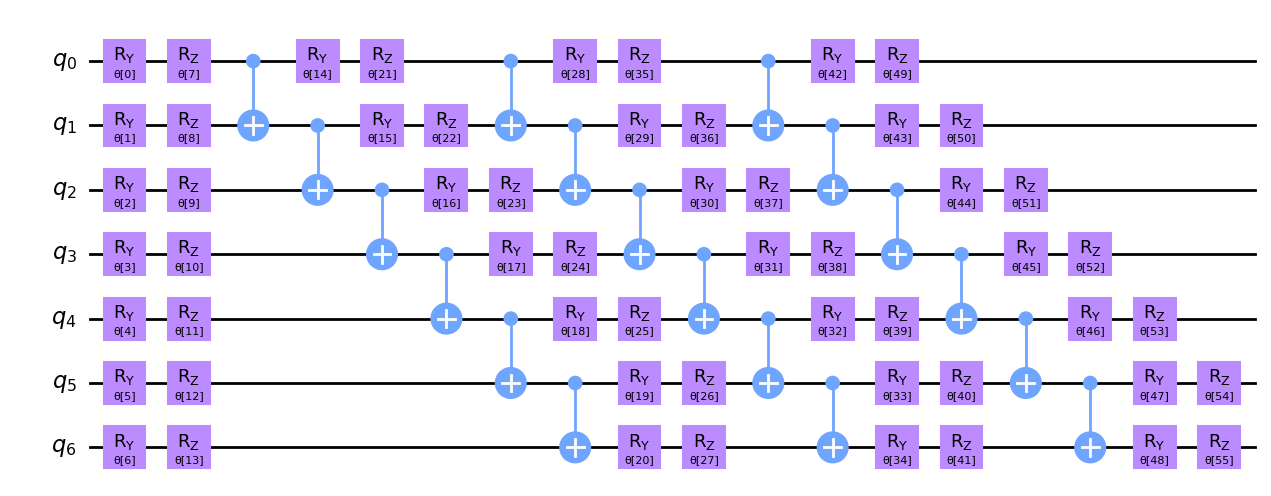

full entanglement:


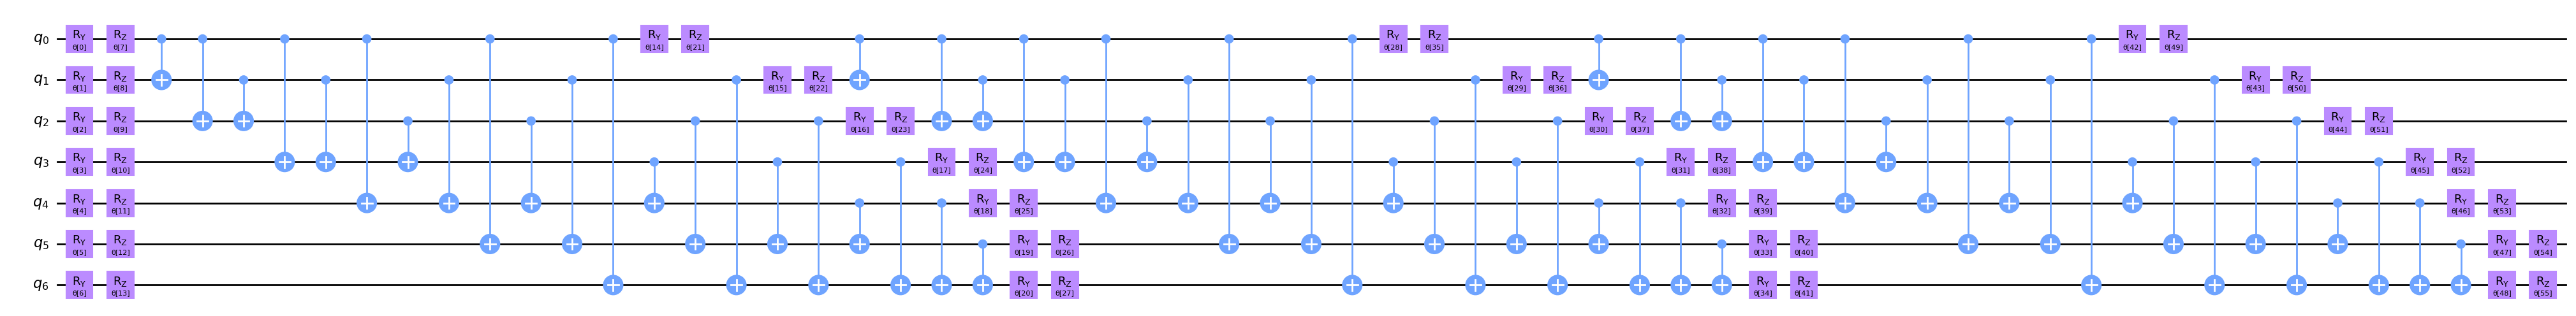

Exact Result: [-1.13722138]
VQE Result: [-0.89328873]
[[1, -0.8947499782409347], [2, -0.889768925673613], [3, -0.8043212197188598], [4, -0.792940267467314], [5, -0.9549252573658307], [6, -0.7623103987202788], [7, -0.8932887323322336]]
linear entanglement:


/home/riccardo/.venv/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


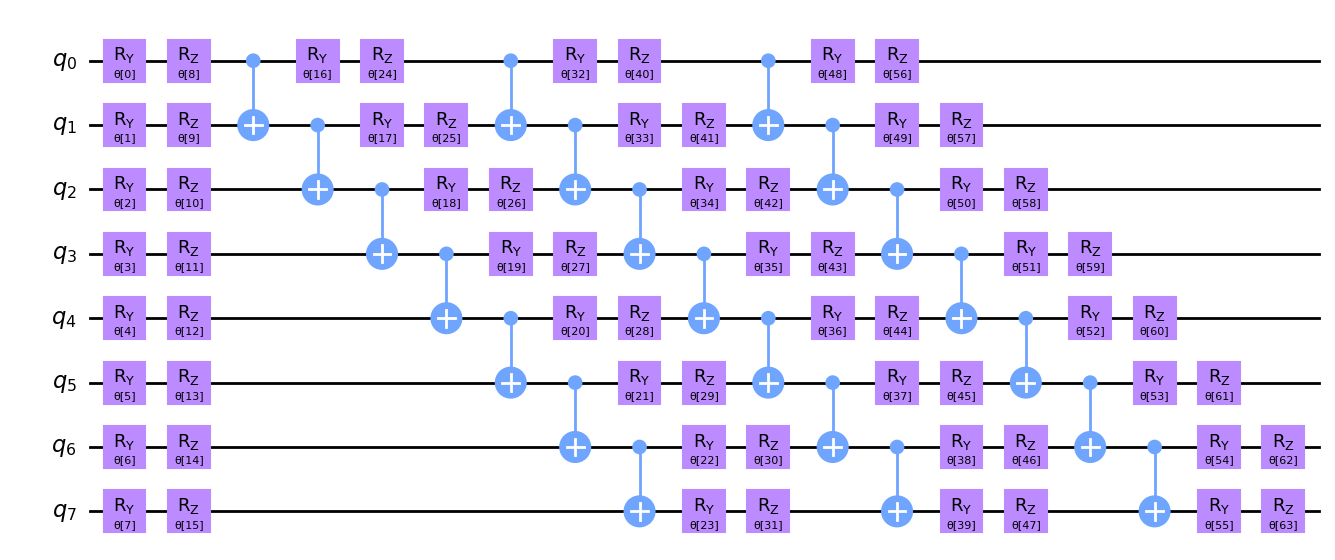

full entanglement:


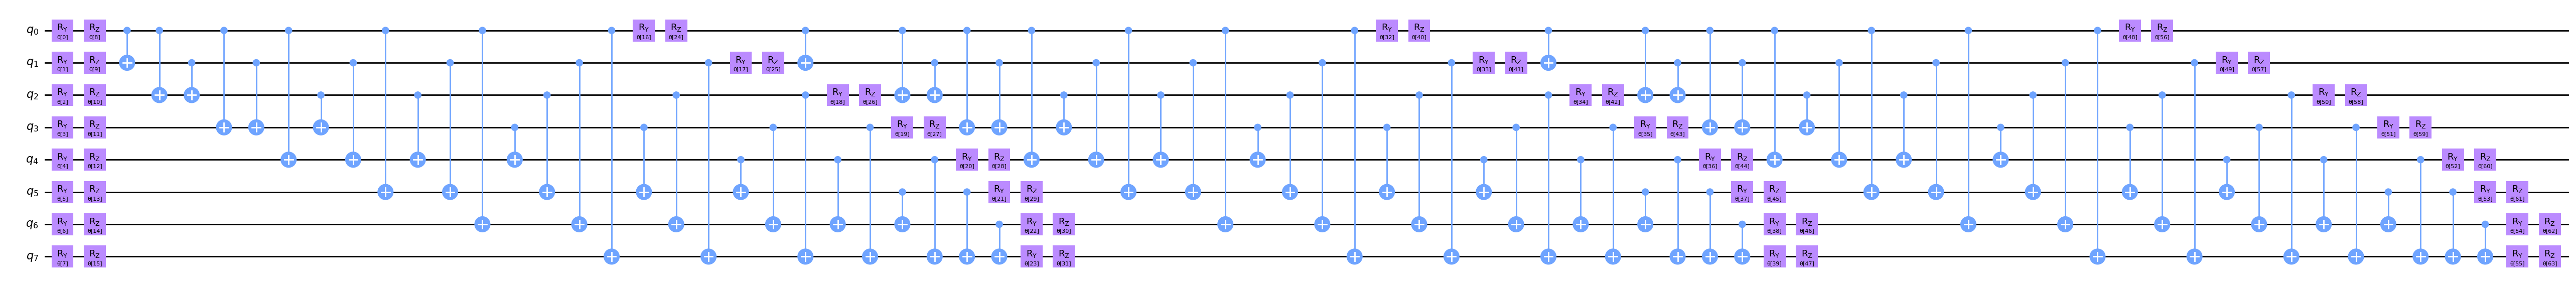

Exact Result: [-1.13722138]
VQE Result: [-0.83569626]
[[1, -0.8947499782409347], [2, -0.889768925673613], [3, -0.8043212197188598], [4, -0.792940267467314], [5, -0.9549252573658307], [6, -0.7623103987202788], [7, -0.8932887323322336], [8, -0.8356962634243466]]
linear entanglement:


/home/riccardo/.venv/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


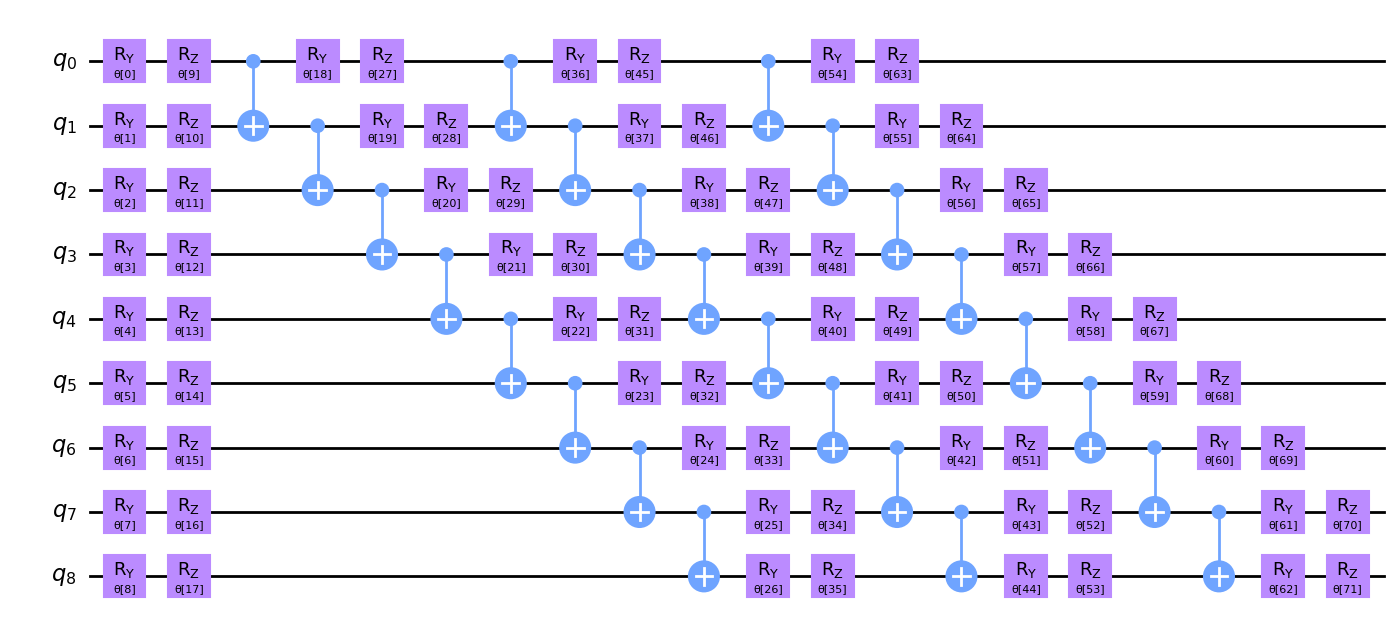

full entanglement:


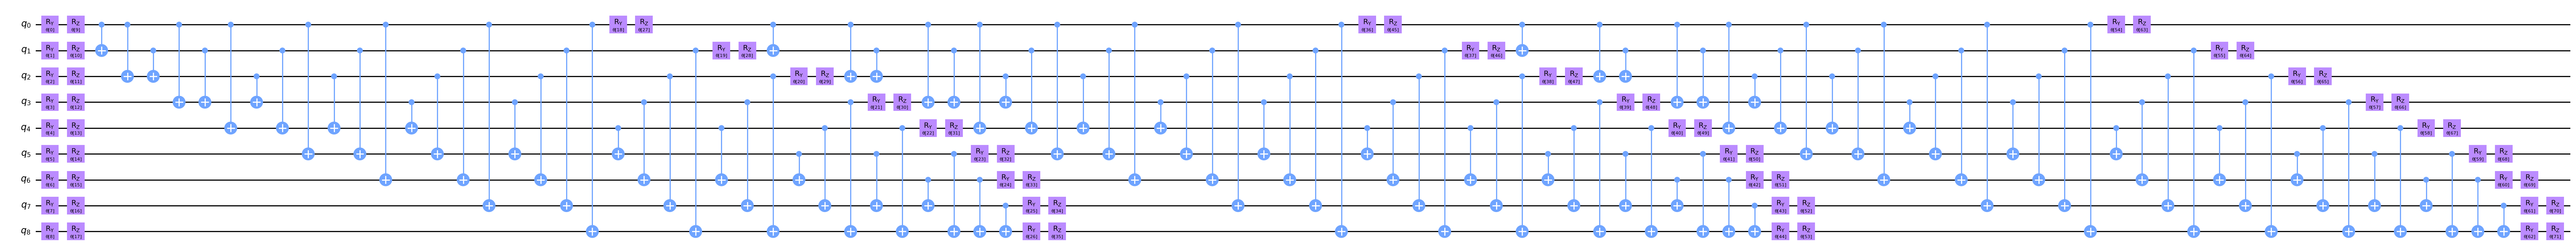

Exact Result: [-1.13722138]
VQE Result: [-0.84100511]
[[1, -0.8947499782409347], [2, -0.889768925673613], [3, -0.8043212197188598], [4, -0.792940267467314], [5, -0.9549252573658307], [6, -0.7623103987202788], [7, -0.8932887323322336], [8, -0.8356962634243466], [9, -0.8410051081170464]]
linear entanglement:


/home/riccardo/.venv/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


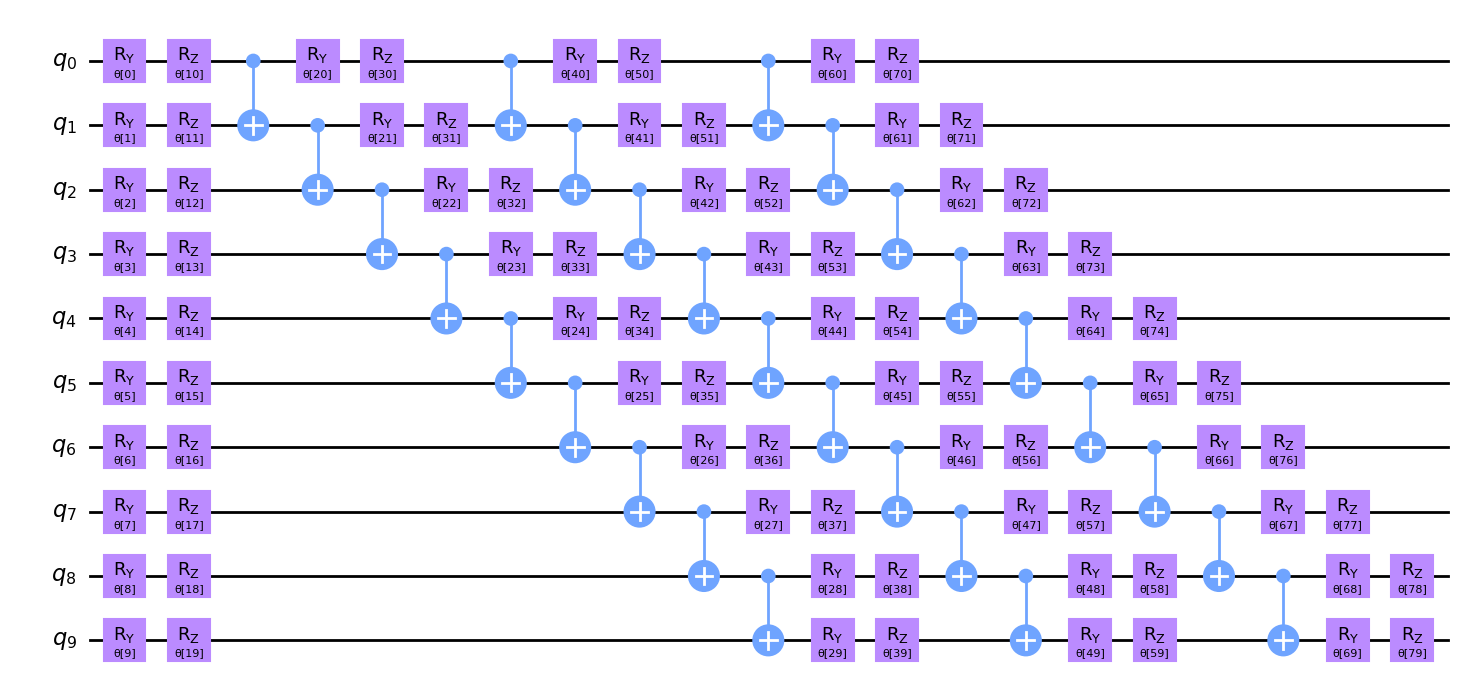

full entanglement:


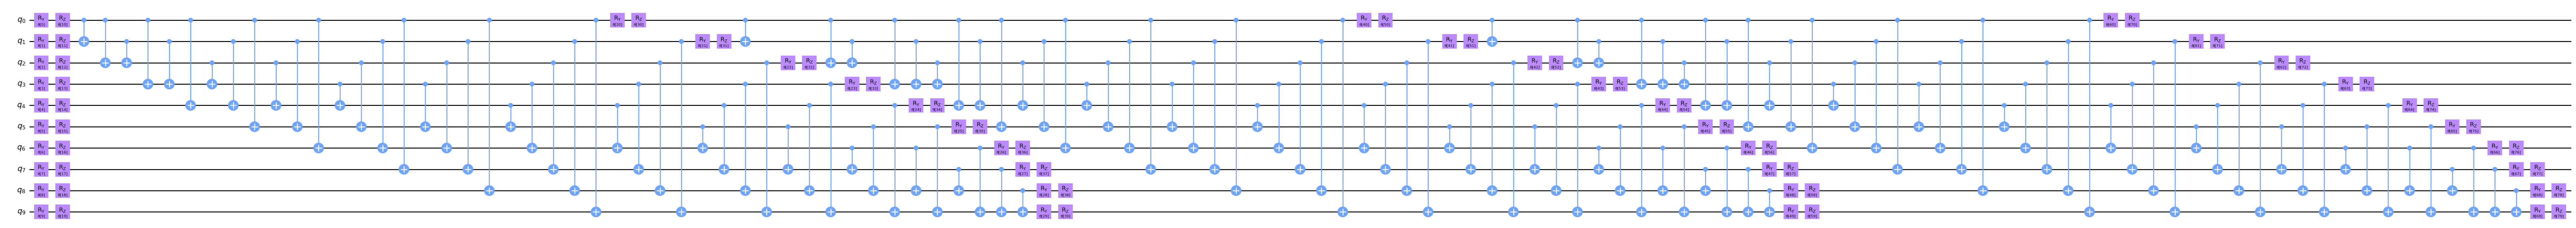

Exact Result: [-1.13722138]
VQE Result: [-0.87112741]
[[1, -0.8947499782409347], [2, -0.889768925673613], [3, -0.8043212197188598], [4, -0.792940267467314], [5, -0.9549252573658307], [6, -0.7623103987202788], [7, -0.8932887323322336], [8, -0.8356962634243466], [9, -0.8410051081170464], [10, -0.8711274065448249]]
linear entanglement:


/home/riccardo/.venv/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


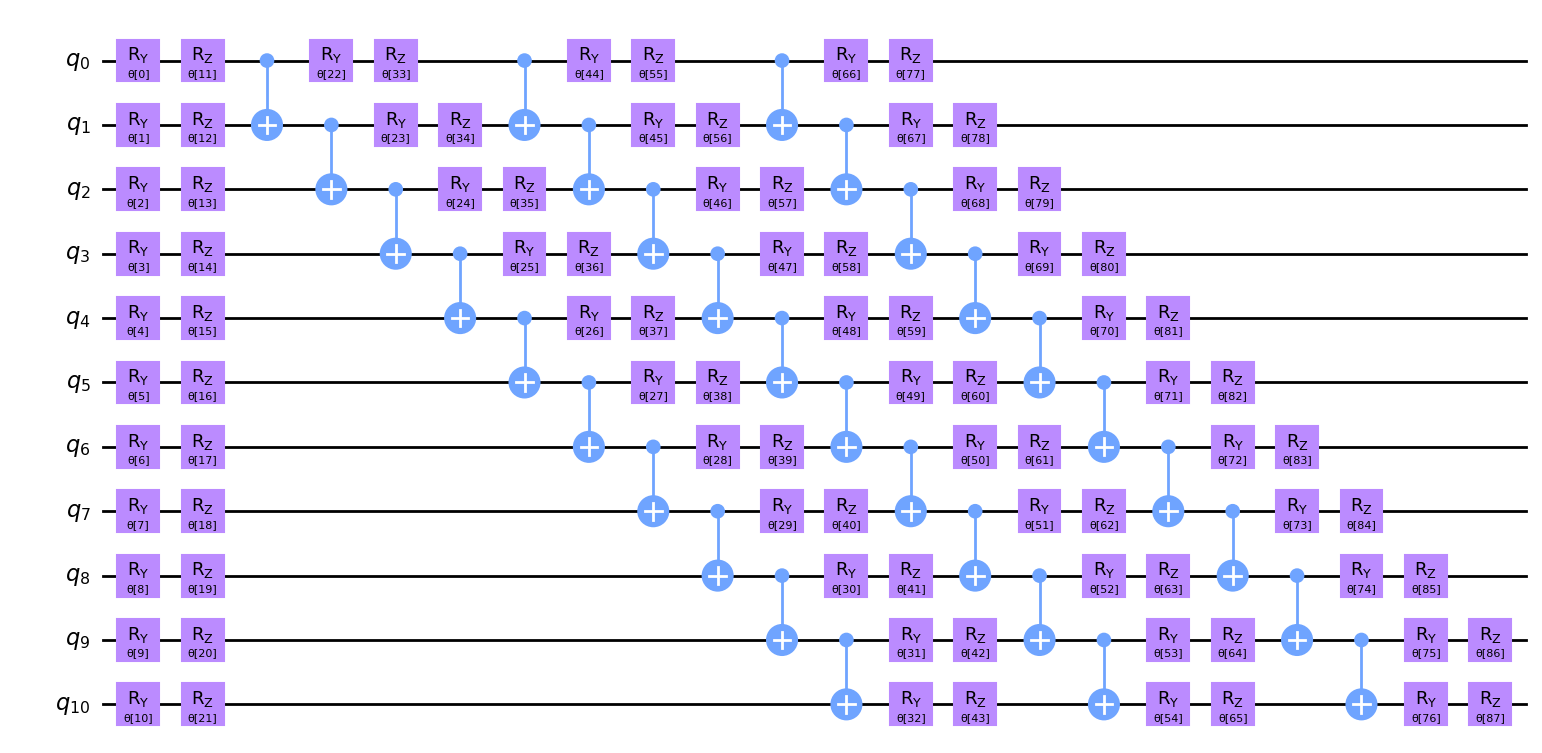

full entanglement:


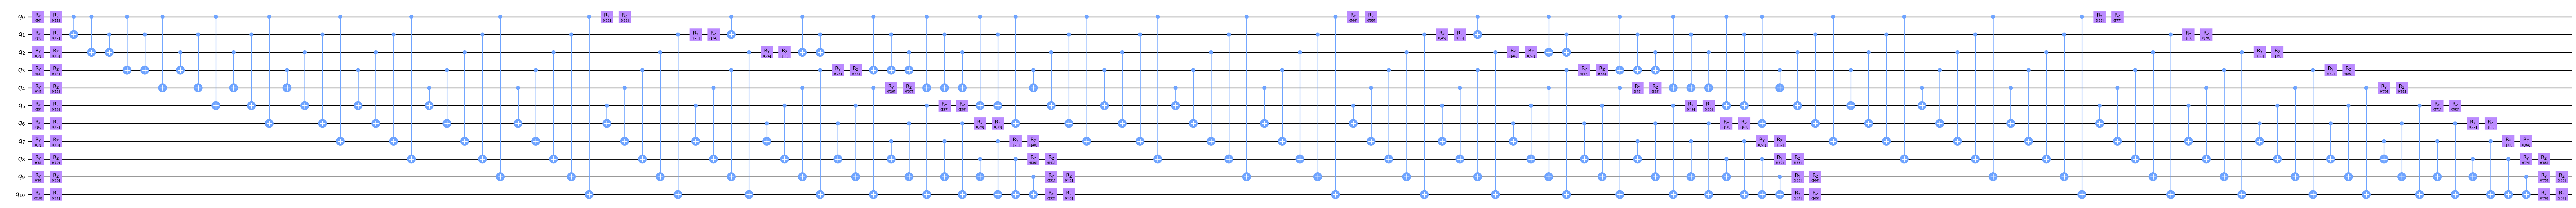

Exact Result: [-1.13722138]
VQE Result: [-0.76196075]
[[1, -0.8947499782409347], [2, -0.889768925673613], [3, -0.8043212197188598], [4, -0.792940267467314], [5, -0.9549252573658307], [6, -0.7623103987202788], [7, -0.8932887323322336], [8, -0.8356962634243466], [9, -0.8410051081170464], [10, -0.8711274065448249], [11, -0.7619607461438673]]
linear entanglement:


/home/riccardo/.venv/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


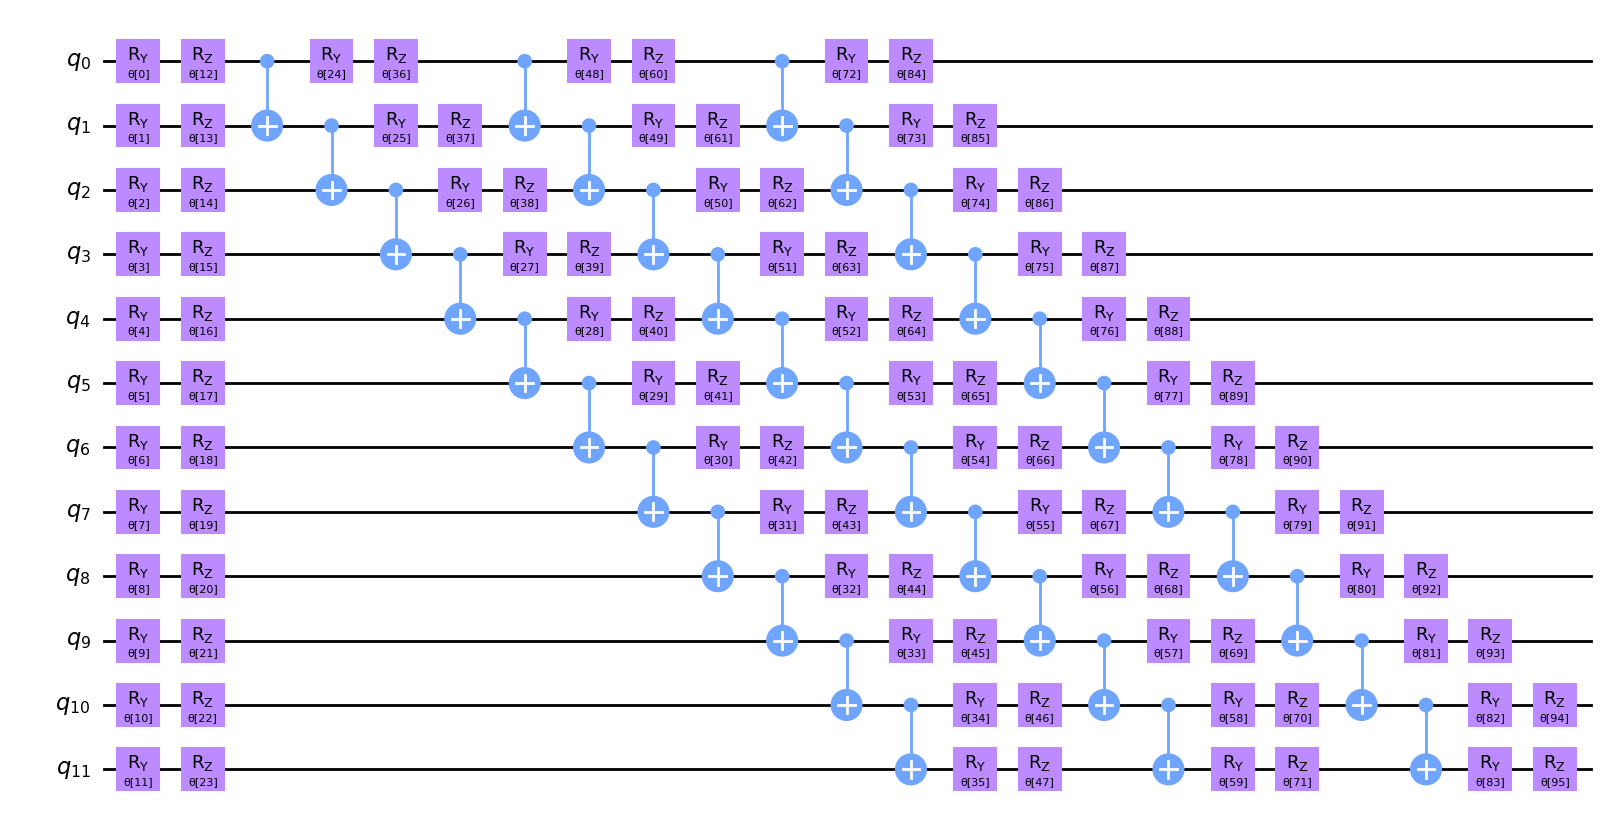

full entanglement:


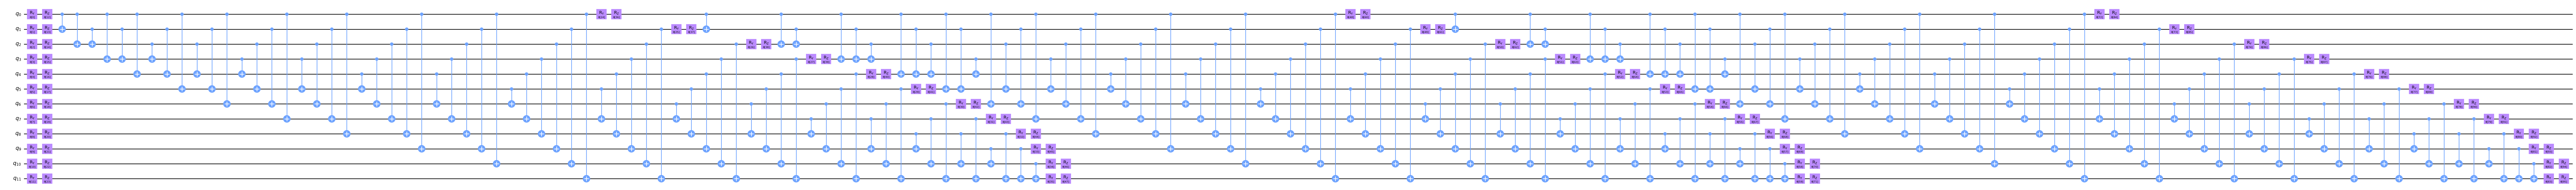

Exact Result: [-1.13722138]
VQE Result: [-0.89152165]
[[1, -0.8947499782409347], [2, -0.889768925673613], [3, -0.8043212197188598], [4, -0.792940267467314], [5, -0.9549252573658307], [6, -0.7623103987202788], [7, -0.8932887323322336], [8, -0.8356962634243466], [9, -0.8410051081170464], [10, -0.8711274065448249], [11, -0.7619607461438673], [12, -0.8915216496398068]]


In [24]:
from qiskit_nature.second_q.mappers import BravyiKitaevMapper
matrice = []
for i in range(1, 13):
    driver = PySCFDriver.from_molecule(molecule)
    problem = driver.run()
    
    second_q_ops = problem.second_q_ops()
    num_spatial_orbitals = problem.num_spatial_orbitals
    num_particles = problem.num_particles
    
    mapper = BravyiKitaevMapper()  
    
    hamiltonian = second_q_ops[0]
    
    # Do two qubit reduction
    qubit_op = mapper.map(hamiltonian)
    
    from qiskit_aer.noise import NoiseModel
    from qiskit.providers.fake_provider import FakeVigo
    
    # fake providers contain data from real IBM Quantum devices stored
    # in Qiskit Terra, and are useful for extracting realistic noise models.
    
    device = FakeVigo()
    coupling_map = device.configuration().coupling_map
    noise_model = NoiseModel.from_backend(device)
    noisy_estimator = Estimator(
        backend_options={"coupling_map": coupling_map, "noise_model": noise_model}
    )
    from qiskit.circuit.library import EfficientSU2
    
    entanglements = ["linear", "full"]
    num_qubits=i
    for entanglement in entanglements:
        form = EfficientSU2(num_qubits, entanglement=entanglement)
        print(f"{entanglement} entanglement:")
        # We initialize all parameters to 0 for this demonstration
        display(form.decompose().draw("mpl", fold=-1))
    from qiskit_aer.primitives import Estimator
    
    
    def exact_solver(qubit_op, problem):
        sol = NumPyMinimumEigensolver().compute_minimum_eigenvalue(qubit_op)
        result = problem.interpret(sol)
        return result
    
    
    distances = np.arange(0.5, 4.0, 0.2)
    exact_energies = []
    vqe_energies = []
    result = exact_solver(qubit_op, problem)
    exact_energies.append(result.total_energies)
    print("Exact Result:", result.total_energies)
    optimizer = SPSA(maxiter=100)
    var_form = EfficientSU2(qubit_op.num_qubits, entanglement="linear") #prepare trial wave functions
    vqe = VQE(noisy_estimator, var_form, optimizer)
    vqe_calc = vqe.compute_minimum_eigenvalue(qubit_op)
    vqe_result = problem.interpret(vqe_calc).total_energies
    print("VQE Result:", vqe_result)
    matrice.append([num_qubits,vqe_result[0]])
    print(matrice)

[[1, -0.8947499782409347], [2, -0.889768925673613], [3, -0.8043212197188598], [4, -0.792940267467314], [5, -0.9549252573658307], [6, -0.7623103987202788], [7, -0.8932887323322336], [8, -0.8356962634243466], [9, -0.8410051081170464], [10, -0.8711274065448249], [11, -0.7619607461438673], [12, -0.8915216496398068]]


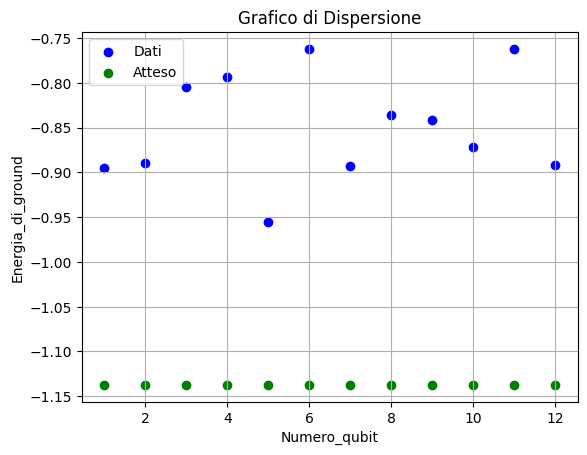

In [25]:
import matplotlib.pyplot as plt
import numpy as np
print(matrice)
atteso = []
for i in range(1, 13):
    atteso.append([i,-1.13722138])
matrice = np.array(matrice)
colonna_x = matrice[:, 0]
colonna_y = matrice[:, 1]
atteso = np.array(atteso)
Acolonna_x = atteso[:, 0]
Acolonna_y = atteso[:, 1]
plt.scatter(colonna_x, colonna_y, color='b', label='Dati')
plt.scatter(Acolonna_x, Acolonna_y, color='g', label='Atteso')
plt.title('Grafico di Dispersione')
plt.xlabel('Numero_qubit')
plt.ylabel('Energia_di_ground')
plt.legend()
plt.grid(True)
plt.show()